In [1]:
import requests
import io
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [2]:
from pathlib import Path
import os
base_dir = r"D:\out\classes\CS526 data science\project\data"


dfs = []
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    if os.path.isdir(folder_path):
        file_path = os.path.join(folder_path, "T_ONTIME_REPORTING.csv") 
        if os.path.exists(file_path):
            df = pd.read_csv(file_path,dtype={'CRS_DEP_TIME': str})
            df["source_folder"] = folder_name  
            dfs.append(df)
        else:
            print(f"⚠️ {file_path} not existing")


merged_df = pd.concat(dfs, ignore_index=True)
merged_df = merged_df[merged_df['ORIGIN_CITY_NAME'] == 'Raleigh/Durham, NC']
merged_df['FL_DATE'] = pd.to_datetime(merged_df['FL_DATE'])
merged_df = merged_df.sort_values('FL_DATE')





C:\Users\ljq\AppData\Local\Temp\ipykernel_14256\1818386382.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['FL_DATE'] = pd.to_datetime(merged_df['FL_DATE'])


In [3]:
merged_df

YEAR  QUARTER  MONTH  DAY_OF_MONTH    FL_DATE  ORIGIN_AIRPORT_ID  \
1159918  2022        1      1             1 2022-01-01              14492   
1159896  2022        1      1             1 2022-01-01              14492   
1159895  2022        1      1             1 2022-01-01              14492   
1159894  2022        1      1             1 2022-01-01              14492   
1159893  2022        1      1             1 2022-01-01              14492   
...       ...      ...    ...           ...        ...                ...   
604420   2024        4     12            31 2024-12-31              14492   
604419   2024        4     12            31 2024-12-31              14492   
604418   2024        4     12            31 2024-12-31              14492   
604448   2024        4     12            31 2024-12-31              14492   
604511   2024        4     12            31 2024-12-31              14492   

         ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN  \
1159918                1449202                  34492    RDU   
1159896                1449202                  34492    RDU   
1159895                1449202                  34492    RDU   
1159894                1449202                  34492    RDU   
1159893                1449202                  34492    RDU   
...                        ...                    ...    ...   
604420                 1449202                  34492    RDU   
604419                 1449202                  34492    RDU   
604418                 1449202                  34492    RDU   
604448                 1449202                  34492    RDU   
604511                 1449202                  34492    RDU   

           ORIGIN_CITY_NAME  ...  DEST_CITY_NAME  DEST_STATE_ABR  \
1159918  Raleigh/Durham, NC  ...     Seattle, WA              WA   
1159896  Raleigh/Durham, NC  ...     Chicago, IL              IL   
1159895  Raleigh/Durham, NC  ...     Orlando, FL              FL   
1159894  Raleigh/Durham, NC  ...     Orlando, FL              FL   
1159893  Raleigh/Durham, NC  ...     Orlando, FL              FL   
...                     ...  ...             ...             ...   
604420   Raleigh/Durham, NC  ...      Dallas, TX              TX   
604419   Raleigh/Durham, NC  ...   Charlotte, NC              NC   
604418   Raleigh/Durham, NC  ...   Charlotte, NC              NC   
604448   Raleigh/Durham, NC  ...  Washington, DC              VA   
604511   Raleigh/Durham, NC  ...       Tampa, FL              FL   

         CRS_DEP_TIME  DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 CANCELLED  \
1159918          0710     705.0      -5.0           0.0       0.0       0.0   
1159896          0605     558.0      -7.0           0.0       0.0       0.0   
1159895          1640       NaN       NaN           NaN       NaN       1.0   
1159894          1355    1614.0     139.0         139.0       1.0       0.0   
1159893          1220    1302.0      42.0          42.0       1.0       0.0   
...               ...       ...       ...           ...       ...       ...   
604420           1155    1206.0      11.0          11.0       0.0       0.0   
604419           1810    1802.0      -8.0           0.0       0.0       0.0   
604418           1620    1610.0     -10.0           0.0       0.0       0.0   
604448           1450    1458.0       8.0           8.0       0.0       0.0   
604511           0705     659.0      -6.0           0.0       0.0       0.0   

         WEATHER_DELAY                       source_folder  
1159918            NaN  T_ONTIME_REPORTING_20251020_125620  
1159896            NaN  T_ONTIME_REPORTING_20251020_125620  
1159895            NaN  T_ONTIME_REPORTING_20251020_125620  
1159894            0.0  T_ONTIME_REPORTING_20251020_125620  
1159893            0.0  T_ONTIME_REPORTING_20251020_125620  
...                ...                                 ...  
604420             NaN  T_ONTIME_REPORTING_20251020_125319  
604419             0.0  T_ONTIME_REPORTING_20251020_125319  


In [4]:
merged_df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DELAY_NEW', 'DEP_DEL15', 'CANCELLED', 'WEATHER_DELAY',
       'source_folder'],
      dtype='object')

In [279]:
merged_df.to_csv("new_merged.csv", index=False)

In [5]:
weather = pd.read_csv("clean_weather_RDU_2022_2024.csv")
weather["DATE"] = pd.to_datetime(weather["DATE"])
weather = weather.sort_values("DATE")

In [6]:
flight=merged_df
flight['CRS_DEP_TIME'] = flight['CRS_DEP_TIME'].astype(str).str.strip()
valid_mask = flight['CRS_DEP_TIME'].str.fullmatch(r'\d{4}', na=False)
invalid_rows = flight[~valid_mask]
invalid_count = len(invalid_rows)
invalid_ratio = invalid_count / len(flight) * 100
print(invalid_rows)
print(invalid_count)
print(invalid_ratio)

Empty DataFrame
Columns: [YEAR, QUARTER, MONTH, DAY_OF_MONTH, FL_DATE, ORIGIN_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID, ORIGIN_CITY_MARKET_ID, ORIGIN, ORIGIN_CITY_NAME, ORIGIN_STATE_ABR, DEST_AIRPORT_ID, DEST_AIRPORT_SEQ_ID, DEST_CITY_MARKET_ID, DEST, DEST_CITY_NAME, DEST_STATE_ABR, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, DEP_DELAY_NEW, DEP_DEL15, CANCELLED, WEATHER_DELAY, source_folder]
Index: []

[0 rows x 25 columns]
0
0.0


In [7]:
flight = flight[valid_mask].copy()
flight = flight.reset_index(drop=True)

In [8]:
flight['CRS_DEP_TIME'] = flight['CRS_DEP_TIME'].astype(str).str.zfill(4)
flight['CRS_DEP_HOUR'] = flight['CRS_DEP_TIME'].str[:2].astype(int)
flight['CRS_DEP_MIN'] = flight['CRS_DEP_TIME'].str[2:].astype(int)
flight['CRS_DEP_DATETIME'] = flight.apply(
    lambda row: row['FL_DATE'] + pd.Timedelta(hours=row['CRS_DEP_HOUR'], minutes=row['CRS_DEP_MIN']),
    axis=1
)

In [9]:
flight = flight.sort_values('CRS_DEP_DATETIME')

In [10]:
merged = pd.merge_asof(
    flight,
    weather,
    left_on="CRS_DEP_DATETIME",
    right_on="DATE",
    direction="nearest",   
    tolerance=pd.Timedelta("1H")  
)
merged

C:\Users\ljq\AppData\Local\Temp\ipykernel_14256\1250268331.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  tolerance=pd.Timedelta("1H")


YEAR  QUARTER  MONTH  DAY_OF_MONTH    FL_DATE  ORIGIN_AIRPORT_ID  \
0       2022        1      1             1 2022-01-01              14492   
1       2022        1      1             1 2022-01-01              14492   
2       2022        1      1             1 2022-01-01              14492   
3       2022        1      1             1 2022-01-01              14492   
4       2022        1      1             1 2022-01-01              14492   
...      ...      ...    ...           ...        ...                ...   
174776  2024        4     12            31 2024-12-31              14492   
174777  2024        4     12            31 2024-12-31              14492   
174778  2024        4     12            31 2024-12-31              14492   
174779  2024        4     12            31 2024-12-31              14492   
174780  2024        4     12            31 2024-12-31              14492   

        ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID ORIGIN  \
0                     1449202                  34492    RDU   
1                     1449202                  34492    RDU   
2                     1449202                  34492    RDU   
3                     1449202                  34492    RDU   
4                     1449202                  34492    RDU   
...                       ...                    ...    ...   
174776                1449202                  34492    RDU   
174777                1449202                  34492    RDU   
174778                1449202                  34492    RDU   
174779                1449202                  34492    RDU   
174780                1449202                  34492    RDU   

          ORIGIN_CITY_NAME  ... HourlyPressureTendency  \
0       Raleigh/Durham, NC  ...                    NaN   
1       Raleigh/Durham, NC  ...                    NaN   
2       Raleigh/Durham, NC  ...                    NaN   
3       Raleigh/Durham, NC  ...                    NaN   
4       Raleigh/Durham, NC  ...                    NaN   
...                    ...  ...                    ...   
174776  Raleigh/Durham, NC  ...                    NaN   
174777  Raleigh/Durham, NC  ...                    NaN   
174778  Raleigh/Durham, NC  ...                    NaN   
174779  Raleigh/Durham, NC  ...                    NaN   
174780  Raleigh/Durham, NC  ...                    3.0   

        HourlyRelativeHumidity                    HourlySkyConditions  \
0                         97.0                            OVC:08 2.13   
1                         97.0                            OVC:08 2.13   
2                         97.0                            OVC:08 2.13   
3                         97.0                            OVC:08 2.13   
4                         97.0                            OVC:08 2.13   
...                        ...                                    ...   
174776                    83.0               FEW:02 8.84 FEW:02 13.72   
174777                    83.0               FEW:02 8.84 FEW:02 13.72   
174778                    83.0               FEW:02 8.84 FEW:02 13.72   
174779                    84.0  SCT:04 8.84 SCT:04 21.34 BKN:07 33.53   
174780                    84.0                                    4.5   

        HourlySeaLevelPressure HourlyVisibility HourlyWindDirection  \
0                       1011.4           16.093               220.0   
1                       1011.4           16.093               220.0   
2                       1011.4           16.093               220.0   
3                       1011.4           16.093               220.0   
4                       1011.4           16.093               220.0   
...                        ...              ...                 ...   
174776                  1003.0           16.093                 000   
174777                  1003.0           16.093                 000   
174778                  1003.0           16.093                 000   
174779                  1002.5           16.093       

In [11]:
merged["time_diff_min"] = (merged["CRS_DEP_DATETIME"] - merged["DATE"]).abs().dt.total_seconds() / 60

In [287]:
merged.to_csv("new_data.csv", index=False)


In [12]:
df=merged[['WEATHER_DELAY','DEP_DELAY','DEP_DEL15','CANCELLED','CRS_DEP_DATETIME','HourlyAltimeterSetting','HourlyDewPointTemperature','HourlyDryBulbTemperature',
'HourlyPrecipitation','HourlyPresentWeatherType','HourlyPressureChange','HourlyPressureTendency','HourlyRelativeHumidity','HourlySkyConditions',
'HourlySeaLevelPressure','HourlyVisibility','HourlyWindDirection','HourlyWindGustSpeed','HourlyWindSpeed','time_diff_min']]
print(df)

        WEATHER_DELAY  DEP_DELAY  DEP_DEL15  CANCELLED    CRS_DEP_DATETIME  \
0                 0.0       64.0        1.0        0.0 2022-01-01 05:30:00   
1                 NaN       -8.0        0.0        0.0 2022-01-01 05:40:00   
2                 NaN       -7.0        0.0        0.0 2022-01-01 05:45:00   
3                 NaN       -3.0        0.0        0.0 2022-01-01 06:00:00   
4                 NaN       -7.0        0.0        0.0 2022-01-01 06:00:00   
...               ...        ...        ...        ...                 ...   
174776            NaN      -10.0        0.0        0.0 2024-12-31 19:45:00   
174777            NaN       -9.0        0.0        0.0 2024-12-31 19:47:00   
174778            NaN      -17.0        0.0        0.0 2024-12-31 20:10:00   
174779            NaN      -12.0        0.0        0.0 2024-12-31 20:26:00   
174780            NaN      -15.0        0.0        0.0 2024-12-31 21:57:00   

        HourlyAltimeterSetting  HourlyDewPointTemperature  \
0 

In [289]:
nan_counts =df.isna().sum()
print(nan_counts)

WEATHER_DELAY                140278
DEP_DELAY                      3411
DEP_DEL15                      3411
CANCELLED                         0
CRS_DEP_DATETIME                  0
HourlyAltimeterSetting        24913
HourlyDewPointTemperature       179
HourlyDryBulbTemperature        172
HourlyPrecipitation           31500
HourlyPresentWeatherType     156841
HourlyPressureChange         114102
HourlyPressureTendency       114102
HourlyRelativeHumidity          179
HourlySkyConditions           15691
HourlySeaLevelPressure        10078
HourlyVisibility               9421
HourlyWindDirection           32484
HourlyWindGustSpeed          155854
HourlyWindSpeed                 237
time_diff_min                   172
dtype: int64


In [290]:
df=df[df['CANCELLED'] != 1]
df=df.drop(columns=['CANCELLED'])


In [291]:
df=df.dropna(subset=['DEP_DELAY'])

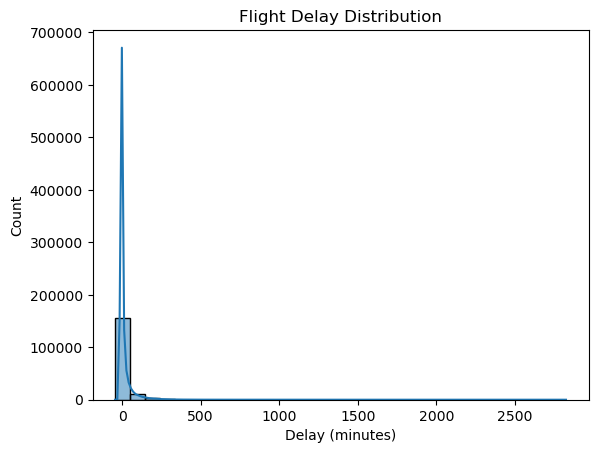

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['DEP_DELAY'], bins=30, kde=True)
plt.title('Flight Delay Distribution')
plt.xlabel('Delay (minutes)')
plt.ylabel('Count')
plt.show()

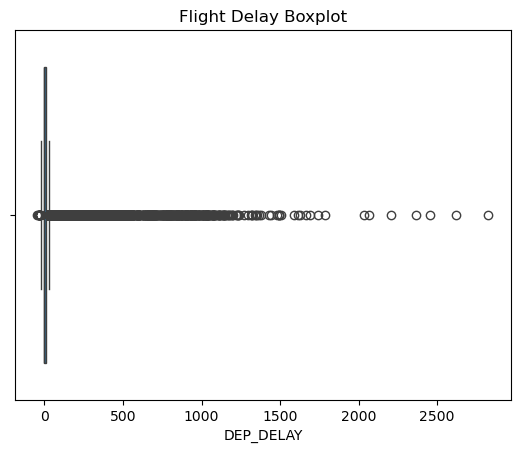

In [293]:
sns.boxplot(x=df['DEP_DELAY'])
plt.title('Flight Delay Boxplot')
plt.show()

In [294]:
import numpy as np
counts, bins = np.histogram(df['DEP_DELAY'], bins=10)
print("bins:", bins)
print("counts:", counts)

bins: [ -45.   242.1  529.2  816.3 1103.4 1390.5 1677.6 1964.7 2251.8 2538.9
 2826. ]
counts: [169715   1188    162    151     38     11      3      3      2      2]


In [295]:
df = df[df['DEP_DELAY'] <= 1*60]#2 hours

In [296]:
#df=df.dropna(subset=['WEATHER_DELAY'])
#print(df)

In [297]:
#w=df[df['WEATHER_DELAY']>0]
#w

In [298]:
#w['WEATHER_DELAY'].mean()

In [299]:
df_copy=df.copy()
df_copy

WEATHER_DELAY  DEP_DELAY  DEP_DEL15    CRS_DEP_DATETIME  \
1                 NaN       -8.0        0.0 2022-01-01 05:40:00   
2                 NaN       -7.0        0.0 2022-01-01 05:45:00   
3                 NaN       -3.0        0.0 2022-01-01 06:00:00   
4                 NaN       -7.0        0.0 2022-01-01 06:00:00   
5                 NaN       -6.0        0.0 2022-01-01 06:00:00   
...               ...        ...        ...                 ...   
174776            NaN      -10.0        0.0 2024-12-31 19:45:00   
174777            NaN       -9.0        0.0 2024-12-31 19:47:00   
174778            NaN      -17.0        0.0 2024-12-31 20:10:00   
174779            NaN      -12.0        0.0 2024-12-31 20:26:00   
174780            NaN      -15.0        0.0 2024-12-31 21:57:00   

        HourlyAltimeterSetting  HourlyDewPointTemperature  \
1                       1011.9                       18.9   
2                       1011.9                       18.9   
3                       1011.9                       18.9   
4                       1011.9                       18.9   
5                       1011.9                       18.9   
...                        ...                        ...   
174776                  1003.0                       11.1   
174777                  1003.0                       11.1   
174778                  1003.0                       11.1   
174779                  1002.7                       11.7   
174780                     NaN                       10.6   

        HourlyDryBulbTemperature HourlyPrecipitation HourlyPresentWeatherType  \
1                           19.4                 0.0                      NaN   
2                           19.4                 0.0                      NaN   
3                           19.4                 0.0                      NaN   
4                           19.4                 0.0                      NaN   
5                           19.4                 0.0                      NaN   
...                          ...                 ...                      ...   
174776                      13.9                 0.0                      NaN   
174777                      13.9                 0.0                      NaN   
174778                      13.9                 0.0                      NaN   
174779                      14.4                 0.0                      NaN   
174780                      13.3                 NaN                      NaN   

        HourlyPressureChange  HourlyPressureTendency  HourlyRelativeHumidity  \
1                        NaN                     NaN                    97.0   
2                        NaN                     NaN                    97.0   
3                        NaN                     NaN                    97.0   
4                        NaN                     NaN                    97.0   
5                        NaN                     NaN                    97.0   
...                      ...                     ...                     ...   
174776                   NaN                     NaN                    83.0   
174777                   NaN                     NaN                    83.0   
174778                   NaN                     NaN                    83.0   
174779                   NaN                     NaN                    84.0   
174780                   0.6                     3.0                    84.0   

                          HourlySkyConditions  HourlySeaLevelPressure  \
1                                 OVC:08 2.13                  1011.4   
2                                 OVC:08 2.13                  1011.4   
3                                 OVC:08 2.13                  1011.4   
4                                 OVC:08 2.13                  1011.4   
5                                 OVC:08 2.13                  1011.4   
...                                       ...                     ...   
174776               FEW:

In [300]:
cloud_types = ["OVC", "BKN", "SCT", "CLR"]
import re
def count_cloud_types(s):
    if pd.isna(s):
        return pd.Series({c: 0 for c in cloud_types})
    counts = {}
    for c in cloud_types:
        counts[c] = len(re.findall(r'\b{}\b'.format(c), str(s)))
    return pd.Series(counts)

cloud_counts = df["HourlySkyConditions"].apply(count_cloud_types)
df = pd.concat([df, cloud_counts], axis=1)

# Weather type encoding
weather_types = ["RA", "SN", "DZ", "FZRA", "PL", "TS", "FG", "BR"]

def encode_weather(s):
    if pd.isna(s):
        return pd.Series({w: 0 for w in weather_types})
    s = str(s).upper()
    result = {}
    for w in weather_types:
        result[w] = 0
        matches = re.findall(r'([+-]?){0}(:\d+)?'.format(w), s)
        if matches:
            for m in matches:
                prefix = m[0]
                if prefix == '+':
                    val = 1
                elif prefix == '-':
                    val = -1
                else:
                    val = 0
                result[w] = max(result[w], val)
    return pd.Series(result)

weather_encoded = df["HourlyPresentWeatherType"].apply(encode_weather)
df = pd.concat([df, weather_encoded], axis=1)

# Handle precipitation (convert 'T' to 0)
df["HourlyPrecipitation"] = df["HourlyPrecipitation"].replace("T", 0).astype(float)

# Prepare features and target for regression
print("Preparing features for regression...")

# Select features for regression
feature_columns = ['HourlyAltimeterSetting', 'HourlyDewPointTemperature', 
                  'HourlyDryBulbTemperature', 'HourlyPrecipitation',
                  'HourlyPressureChange', 'HourlyPressureTendency',
                  'HourlyRelativeHumidity', 'HourlySeaLevelPressure', 
                  'HourlyVisibility', 'HourlyWindGustSpeed', 'HourlyWindSpeed',
                  ]+cloud_types +weather_types

# Remove rows with missing values in selected features
df_reg = df[['DEP_DELAY'] + feature_columns ].copy()


Preparing features for regression...


In [301]:
df_reg

DEP_DELAY  HourlyAltimeterSetting  HourlyDewPointTemperature  \
1            -8.0                  1011.9                       18.9   
2            -7.0                  1011.9                       18.9   
3            -3.0                  1011.9                       18.9   
4            -7.0                  1011.9                       18.9   
5            -6.0                  1011.9                       18.9   
...           ...                     ...                        ...   
174776      -10.0                  1003.0                       11.1   
174777       -9.0                  1003.0                       11.1   
174778      -17.0                  1003.0                       11.1   
174779      -12.0                  1002.7                       11.7   
174780      -15.0                     NaN                       10.6   

        HourlyDryBulbTemperature  HourlyPrecipitation  HourlyPressureChange  \
1                           19.4                  0.0                   NaN   
2                           19.4                  0.0                   NaN   
3                           19.4                  0.0                   NaN   
4                           19.4                  0.0                   NaN   
5                           19.4                  0.0                   NaN   
...                          ...                  ...                   ...   
174776                      13.9                  0.0                   NaN   
174777                      13.9                  0.0                   NaN   
174778                      13.9                  0.0                   NaN   
174779                      14.4                  0.0                   NaN   
174780                      13.3                  NaN                   0.6   

        HourlyPressureTendency  HourlyRelativeHumidity  \
1                          NaN                    97.0   
2                          NaN                    97.0   
3                          NaN                    97.0   
4                          NaN                    97.0   
5                          NaN                    97.0   
...                        ...                     ...   
174776                     NaN                    83.0   
174777                     NaN                    83.0   
174778                     NaN                    83.0   
174779                     NaN                    84.0   
174780                     3.0                    84.0   

        HourlySeaLevelPressure HourlyVisibility  ...  SCT CLR  RA  SN  DZ  \
1                       1011.4           16.093  ...    0   0   0   0   0   
2                       1011.4           16.093  ...    0   0   0   0   0   
3                       1011.4           16.093  ...    0   0   0   0   0   
4                       1011.4           16.093  ...    0   0   0   0   0   
5                       1011.4           16.093  ...    0   0   0   0   0   
...                        ...              ...  ...  ...  ..  ..  ..  ..   
174776                  1003.0           16.093  ...    0   0   0   0   0   
174777                  1003.0           16.093  ...    0   0   0   0   0   
174778                  1003.0           16.093  ...    0   0   0   0   0   
174779                  1002.5           16.093  ...    2   0   0   0   0   
174780                  1003.8             16.0  ...    0   0   0   0   0   

        FZRA  PL  TS  FG  BR  
1          0   0   0   0   0  
2          0   0   0   0   0  
3          0   0   0   0   0  
4          0   0   0   0   0  
5          0   0   0   0   0  
...      ...  ..  ..  ..  ..  
174776     0   0   0   0   0  
174777     0   0   0   0   0  
174778     0   0   0   0   0  
174779     0   0   0   0   0  
174780     0   0   0   0   0  

[158960 rows x 24 columns]

In [302]:
non_numeric = df_reg.select_dtypes(exclude=['number']).columns
print(non_numeric)

Index(['HourlyVisibility', 'HourlyWindSpeed'], dtype='object')


In [303]:
col='HourlyVisibility'
temp = pd.to_numeric(df_reg[col], errors='coerce')

invalid_mask = temp.isna() & df_reg[col].notna()

print(df_reg.loc[invalid_mask, col])

62130     3.219V
62131     3.219V
62132     3.219V
62133     3.219V
62134     3.219V
           ...  
174135         *
174136         *
174137         *
174139         *
174140         *
Name: HourlyVisibility, Length: 144, dtype: object


In [304]:
for i in non_numeric:
    df_reg[i] = pd.to_numeric(df_reg[i], errors='coerce')
df_reg

DEP_DELAY  HourlyAltimeterSetting  HourlyDewPointTemperature  \
1            -8.0                  1011.9                       18.9   
2            -7.0                  1011.9                       18.9   
3            -3.0                  1011.9                       18.9   
4            -7.0                  1011.9                       18.9   
5            -6.0                  1011.9                       18.9   
...           ...                     ...                        ...   
174776      -10.0                  1003.0                       11.1   
174777       -9.0                  1003.0                       11.1   
174778      -17.0                  1003.0                       11.1   
174779      -12.0                  1002.7                       11.7   
174780      -15.0                     NaN                       10.6   

        HourlyDryBulbTemperature  HourlyPrecipitation  HourlyPressureChange  \
1                           19.4                  0.0                   NaN   
2                           19.4                  0.0                   NaN   
3                           19.4                  0.0                   NaN   
4                           19.4                  0.0                   NaN   
5                           19.4                  0.0                   NaN   
...                          ...                  ...                   ...   
174776                      13.9                  0.0                   NaN   
174777                      13.9                  0.0                   NaN   
174778                      13.9                  0.0                   NaN   
174779                      14.4                  0.0                   NaN   
174780                      13.3                  NaN                   0.6   

        HourlyPressureTendency  HourlyRelativeHumidity  \
1                          NaN                    97.0   
2                          NaN                    97.0   
3                          NaN                    97.0   
4                          NaN                    97.0   
5                          NaN                    97.0   
...                        ...                     ...   
174776                     NaN                    83.0   
174777                     NaN                    83.0   
174778                     NaN                    83.0   
174779                     NaN                    84.0   
174780                     3.0                    84.0   

        HourlySeaLevelPressure  HourlyVisibility  ...  SCT  CLR  RA  SN  DZ  \
1                       1011.4            16.093  ...    0    0   0   0   0   
2                       1011.4            16.093  ...    0    0   0   0   0   
3                       1011.4            16.093  ...    0    0   0   0   0   
4                       1011.4            16.093  ...    0    0   0   0   0   
5                       1011.4            16.093  ...    0    0   0   0   0   
...                        ...               ...  ...  ...  ...  ..  ..  ..   
174776                  1003.0            16.093  ...    0    0   0   0   0   
174777                  1003.0            16.093  ...    0    0   0   0   0   
174778                  1003.0            16.093  ...    0    0   0   0   0   
174779                  1002.5            16.093  ...    2    0   0   0   0   
174780                  1003.8            16.000  ...    0    0   0   0   0   

        FZRA  PL  TS  FG  BR  
1          0   0   0   0   0  
2          0   0   0   0   0  
3          0   0   0   0   0  
4          0   0   0   0   0  
5          0   0   0   0   0  
...      ...  ..  ..  ..  ..  
174776     0   0   0   0   0  
174777     0   0   0   0   0  
174778     0   0   0   0   0  
174779     0   0   0   0   0  
174780     0   0   0   0   0  

[158960 rows x 24 columns]

In [305]:
df_reg = df_reg.dropna(thresh=df_reg.shape[1] - 2)
imputer = IterativeImputer(random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df_reg), columns=df_reg.columns)
df_reg=df_imputed

In [306]:
df_reg

DEP_DELAY  HourlyAltimeterSetting  HourlyDewPointTemperature  \
0           -1.0                  1011.5                       19.4   
1           -4.0                  1011.5                       19.4   
2           -9.0                  1011.5                       19.4   
3           -3.0                  1011.5                       19.4   
4           -8.0                  1011.5                       19.4   
...          ...                     ...                        ...   
44821       -1.0                  1003.7                       11.1   
44822       -5.0                  1003.7                       11.1   
44823        7.0                  1003.0                       11.1   
44824       20.0                  1003.4                       11.1   
44825       -8.0                  1003.4                       11.1   

       HourlyDryBulbTemperature  HourlyPrecipitation  HourlyPressureChange  \
0                          20.0                  0.0             -0.500000   
1                          20.0                  0.0             -0.500000   
2                          20.0                  0.0             -0.500000   
3                          20.0                  0.0             -0.500000   
4                          20.0                  0.0             -0.500000   
...                         ...                  ...                   ...   
44821                      18.9                  0.0             -0.907913   
44822                      18.9                  0.0             -0.900427   
44823                      17.8                  0.0             -0.364340   
44824                      15.0                  0.0              0.000000   
44825                      15.0                  0.0              0.000000   

       HourlyPressureTendency  HourlyRelativeHumidity  HourlySeaLevelPressure  \
0                    6.000000                    96.0                  1011.3   
1                    6.000000                    96.0                  1011.3   
2                    6.000000                    96.0                  1011.3   
3                    6.000000                    96.0                  1011.3   
4                    6.000000                    96.0                  1011.3   
...                       ...                     ...                     ...   
44821                7.025482                    61.0                  1003.5   
44822                6.988695                    61.0                  1003.5   
44823                4.705916                    65.0                  1002.7   
44824                3.000000                    78.0                  1003.4   
44825                3.000000                    78.0                  1003.4   

       HourlyVisibility  ...  SCT  CLR   RA   SN   DZ  FZRA   PL   TS   FG  \
0                 9.656  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1                 9.656  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
2                 9.656  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
3                 9.656  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
4                 9.656  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
...                 ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   
44821            16.093  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
44822            16.093  ...  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
44823            16.093  ...  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
44824            16.093  ...  2.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
44825            16.093  ...  2.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   

        BR  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
44821  0.0  
44822  0.0  
44823  0.0  
44824  0.0  
44825  0.0  

[44826 rows x 24 columns]

In [307]:
X = df_reg[feature_columns]
y = df_reg['DEP_DELAY']  # Target variable: flight delay time

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (44826, 23)
Target shape: (44826,)


In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import f_regression
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import re
import warnings


Step 3: Data Normalization and Complete Univariate Analysis
1. Data Normalization
Data normalization completed

2. Complete Univariate Analysis - All Input Variables
2.1 Statistical Summary of All Input Variables

Statistical Summary of All Normalized Input Variables:
       HourlyAltimeterSetting  HourlyDewPointTemperature  \
count              44826.0000                 44826.0000   
mean                   0.0000                     0.0000   
std                    1.0000                     1.0000   
min                   -4.0193                    -3.2919   
25%                   -0.6306                    -0.8057   
50%                    0.0149                     0.2345   
75%                    0.6604                     0.8171   
max                    3.7851                     1.6805   

       HourlyDryBulbTemperature  HourlyPrecipitation  HourlyPressureChange  \
count                44826.0000           44826.0000            44826.0000   
mean                    -0.0000  

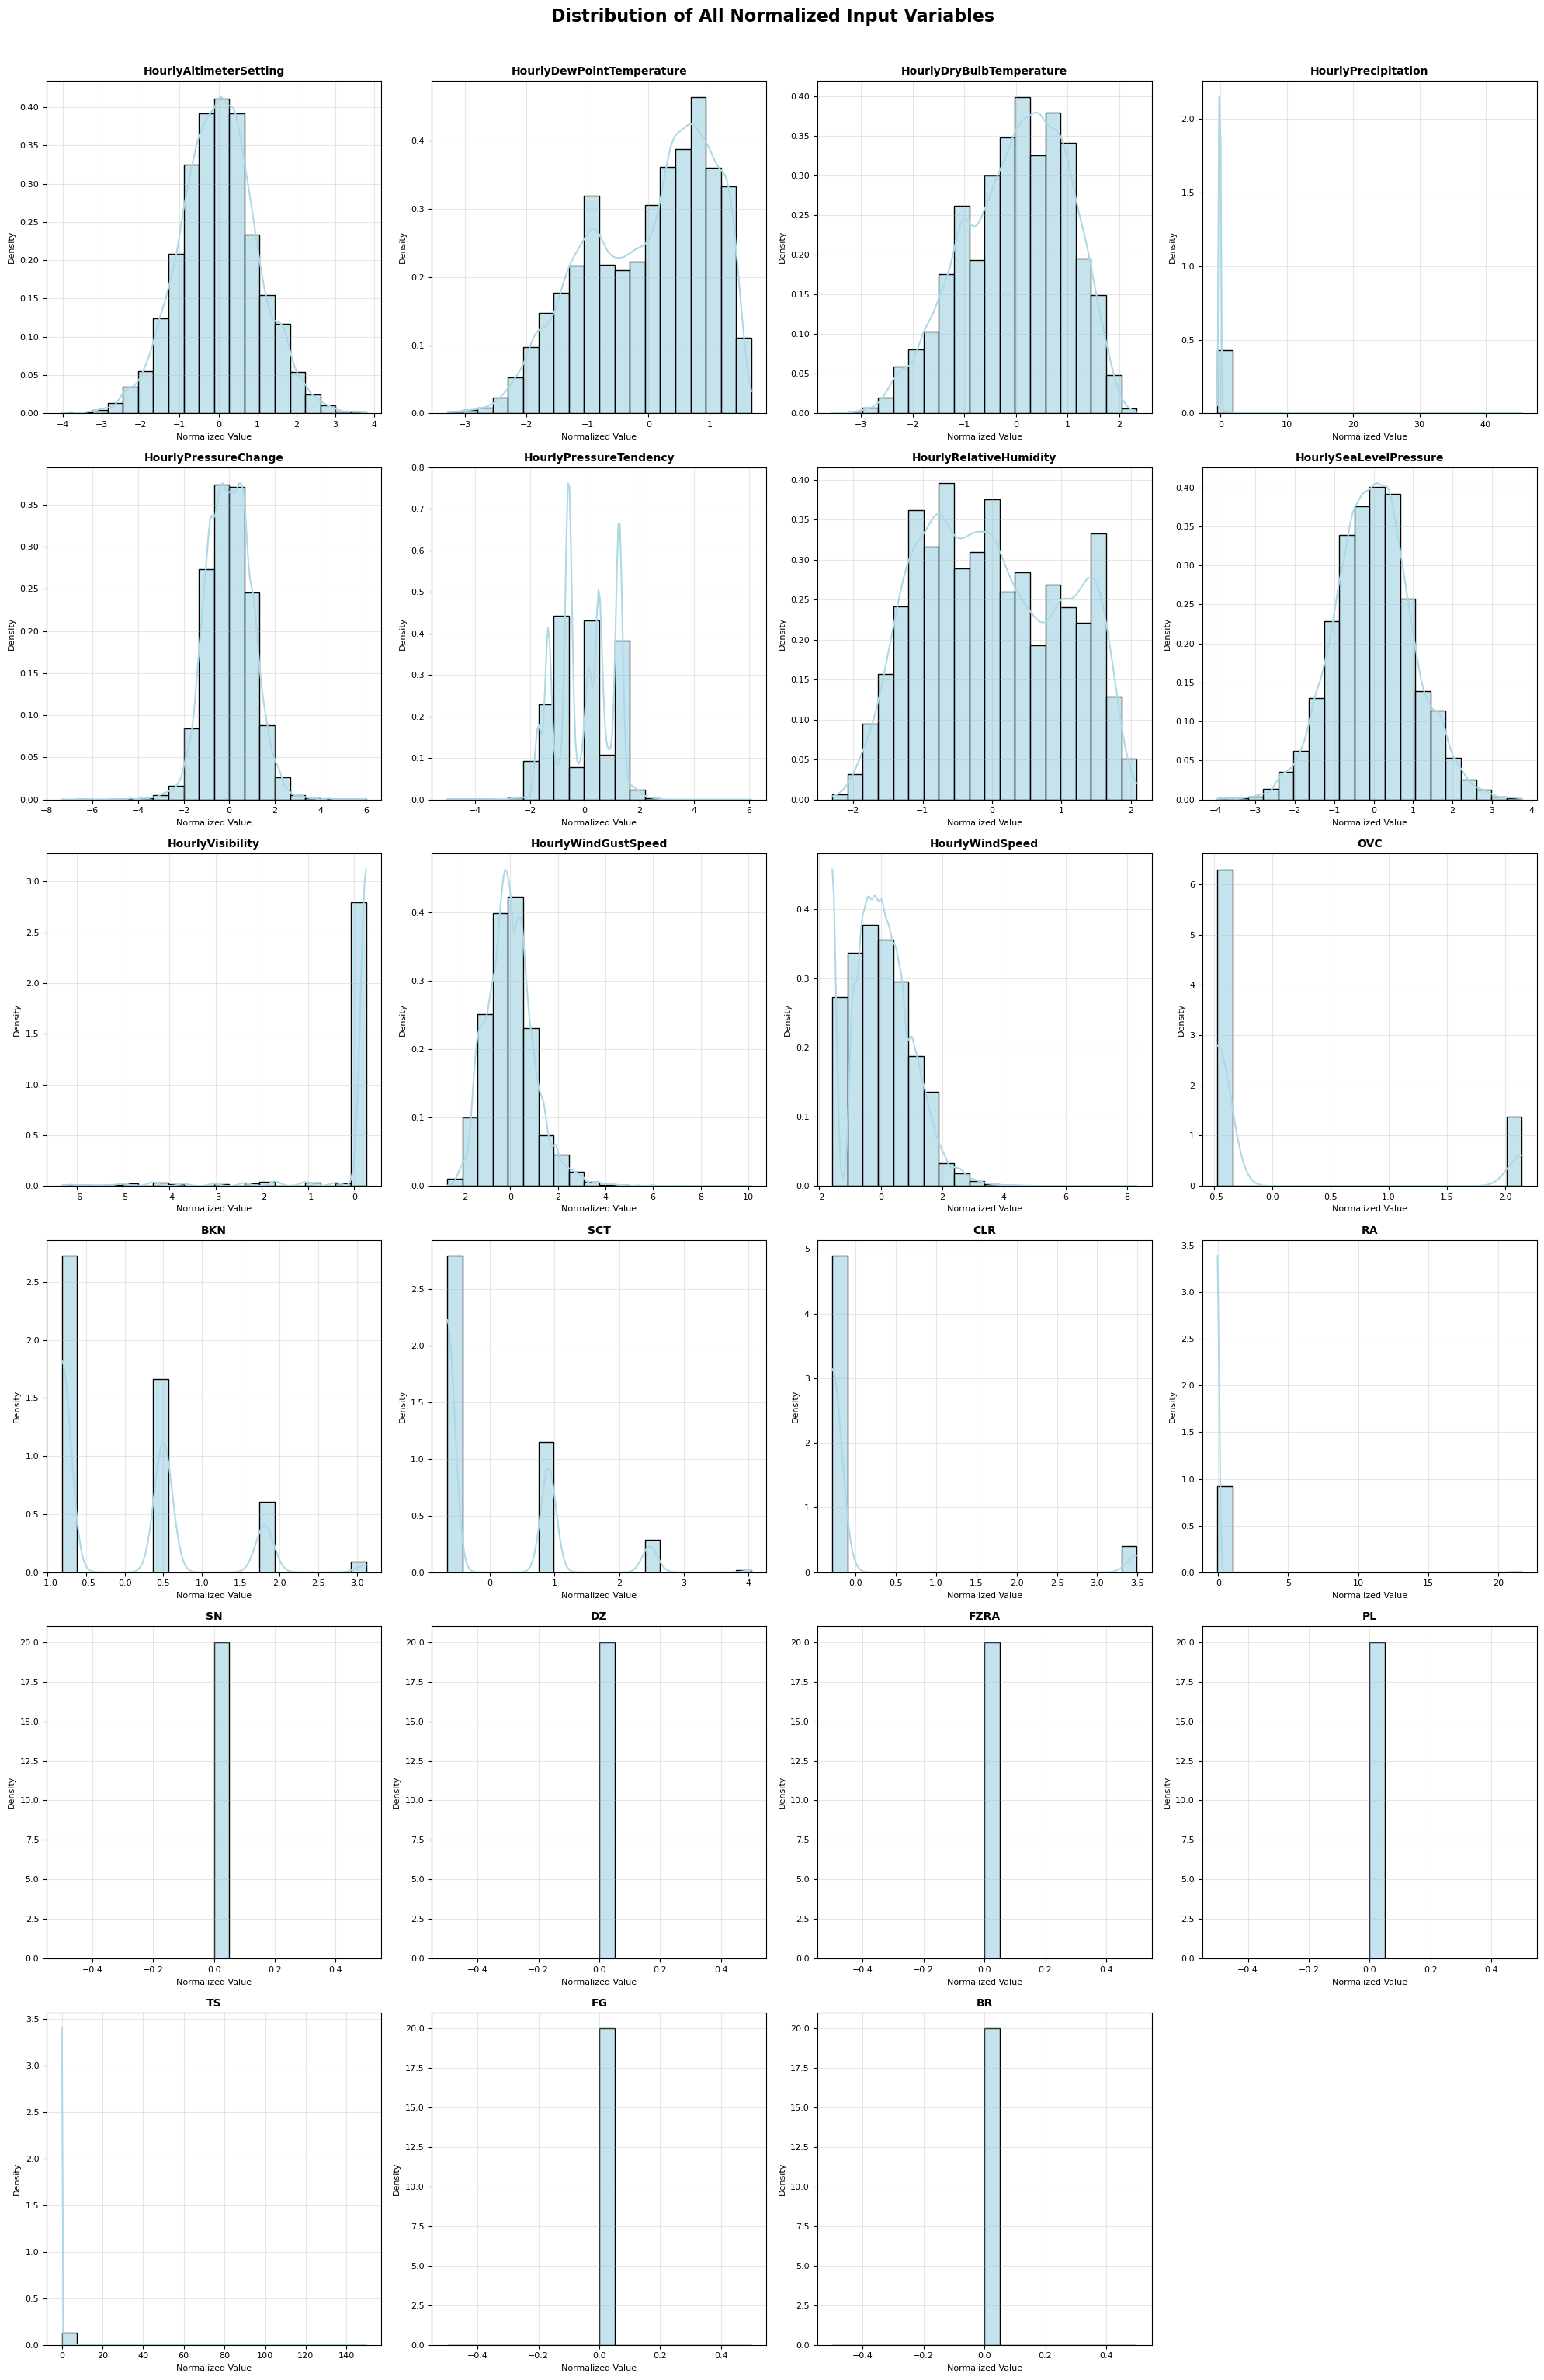


2.3 Box Plots for All Variables - Outlier Detection


C:\Users\ljq\AppData\Local\Temp\ipykernel_9320\3640138627.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(box_data, labels=feature_columns, patch_artist=True)


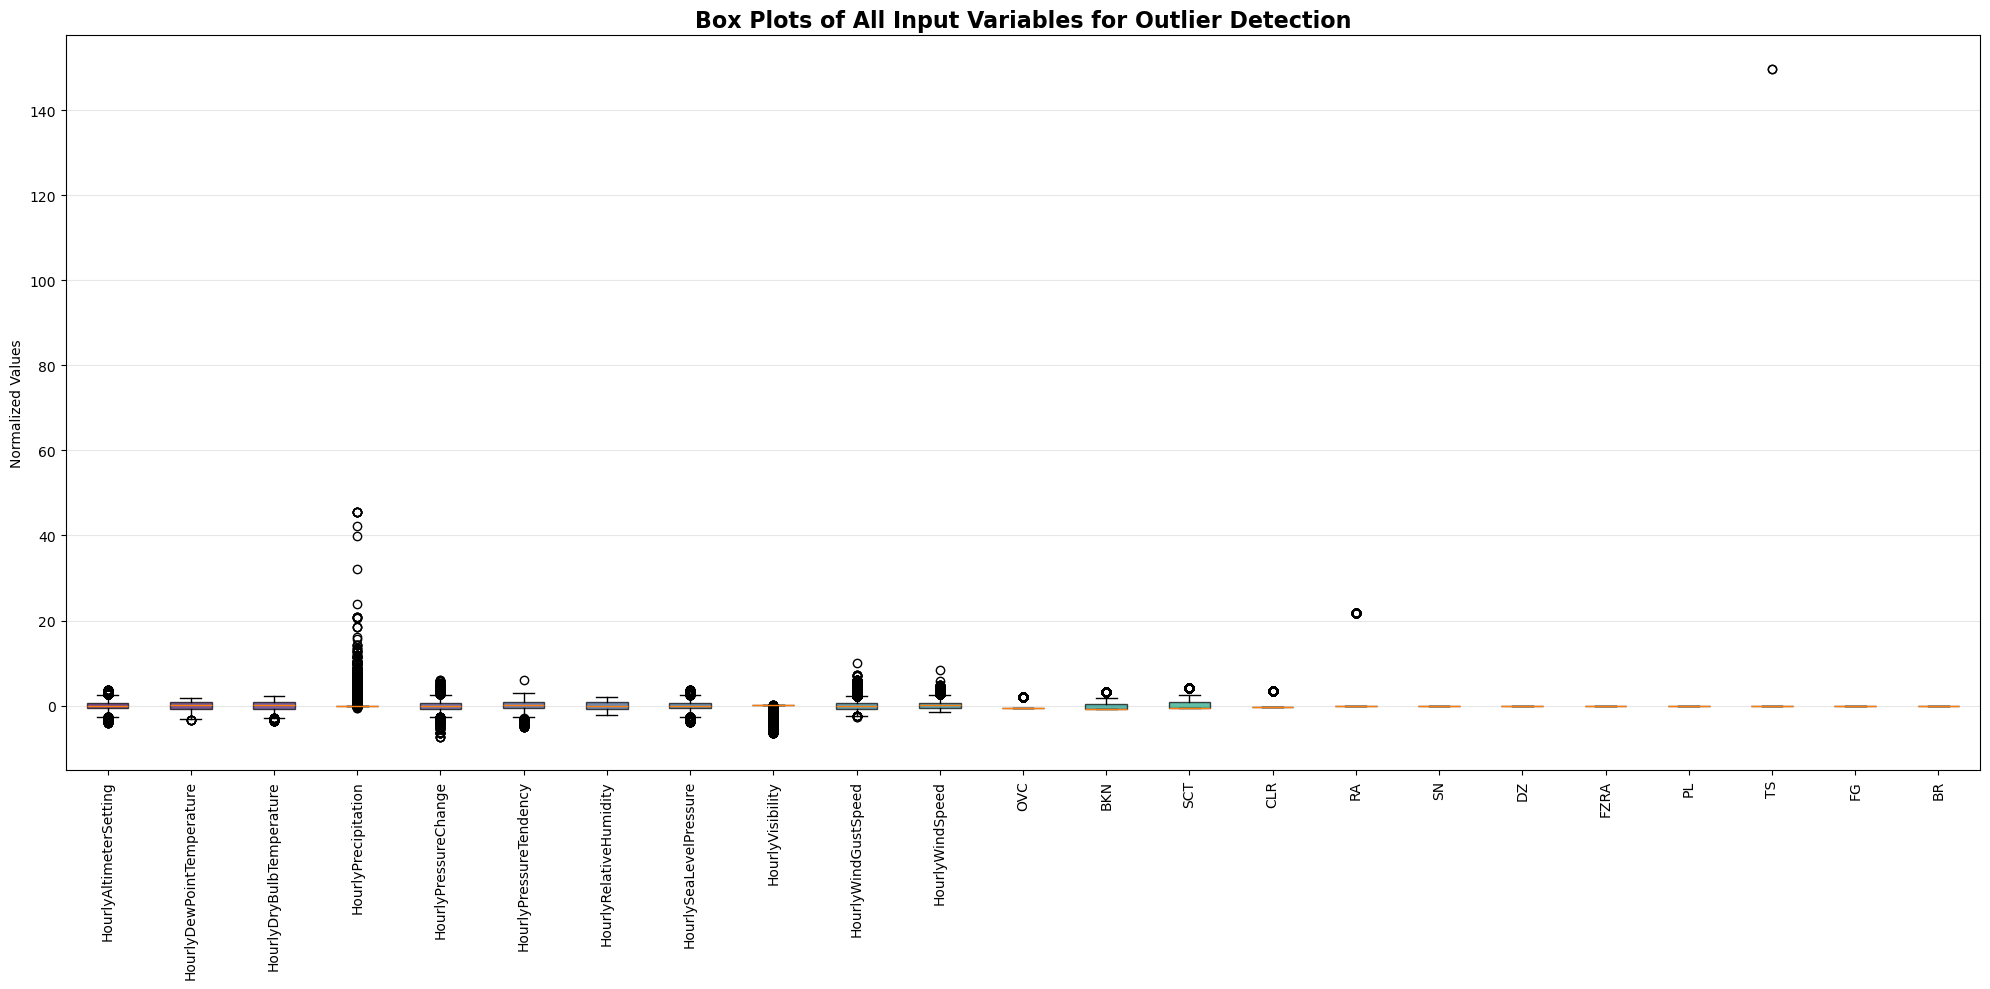

In [309]:
print("\nStep 3: Data Normalization and Complete Univariate Analysis")

# Data Normalization
print("1. Data Normalization")
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=feature_columns, index=X.index)
print("Data normalization completed")

# Create comprehensive univariate analysis
print("\n2. Complete Univariate Analysis - All Input Variables")

# 2.1 Statistical summary of all variables
print("2.1 Statistical Summary of All Input Variables")
stat_summary_all = X_normalized_df.describe()
print("\nStatistical Summary of All Normalized Input Variables:")
print(stat_summary_all.round(4))

# 2.2 Distribution histograms for all variables
print("\n2.2 Distribution Histograms for All Variables")

# Create multiple subplots to display distributions of all variables
n_features = len(feature_columns)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(feature_columns):
    ax = axes[i]
    
    # Create histogram with density curve
    sns.histplot(X_normalized_df[feature], kde=True, stat="density", bins=20, ax=ax, 
                 color='lightblue', alpha=0.7, edgecolor='black')
    
    ax.set_title(f'{feature}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Normalized Value', fontsize=8)
    ax.set_ylabel('Density', fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide excess subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Distribution of All Normalized Input Variables', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 2.3 Box plots for all variables (outlier detection)
print("\n2.3 Box Plots for All Variables - Outlier Detection")

plt.figure(figsize=(20, 10))
box_data = [X_normalized_df[feature] for feature in feature_columns]

# Create box plots
box_plot = plt.boxplot(box_data, labels=feature_columns, patch_artist=True)

# Color the box plots
colors = plt.cm.viridis(np.linspace(0, 1, len(box_data)))
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Box Plots of All Input Variables for Outlier Detection', 
          fontsize=16, fontweight='bold')
plt.ylabel('Normalized Values')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


Step 4: Complete Multivariate Analysis and Correlation Analysis
4.1 Creating Complete Pairwise Relationships with All Variables
Creating PairGrid visualization with all variables...


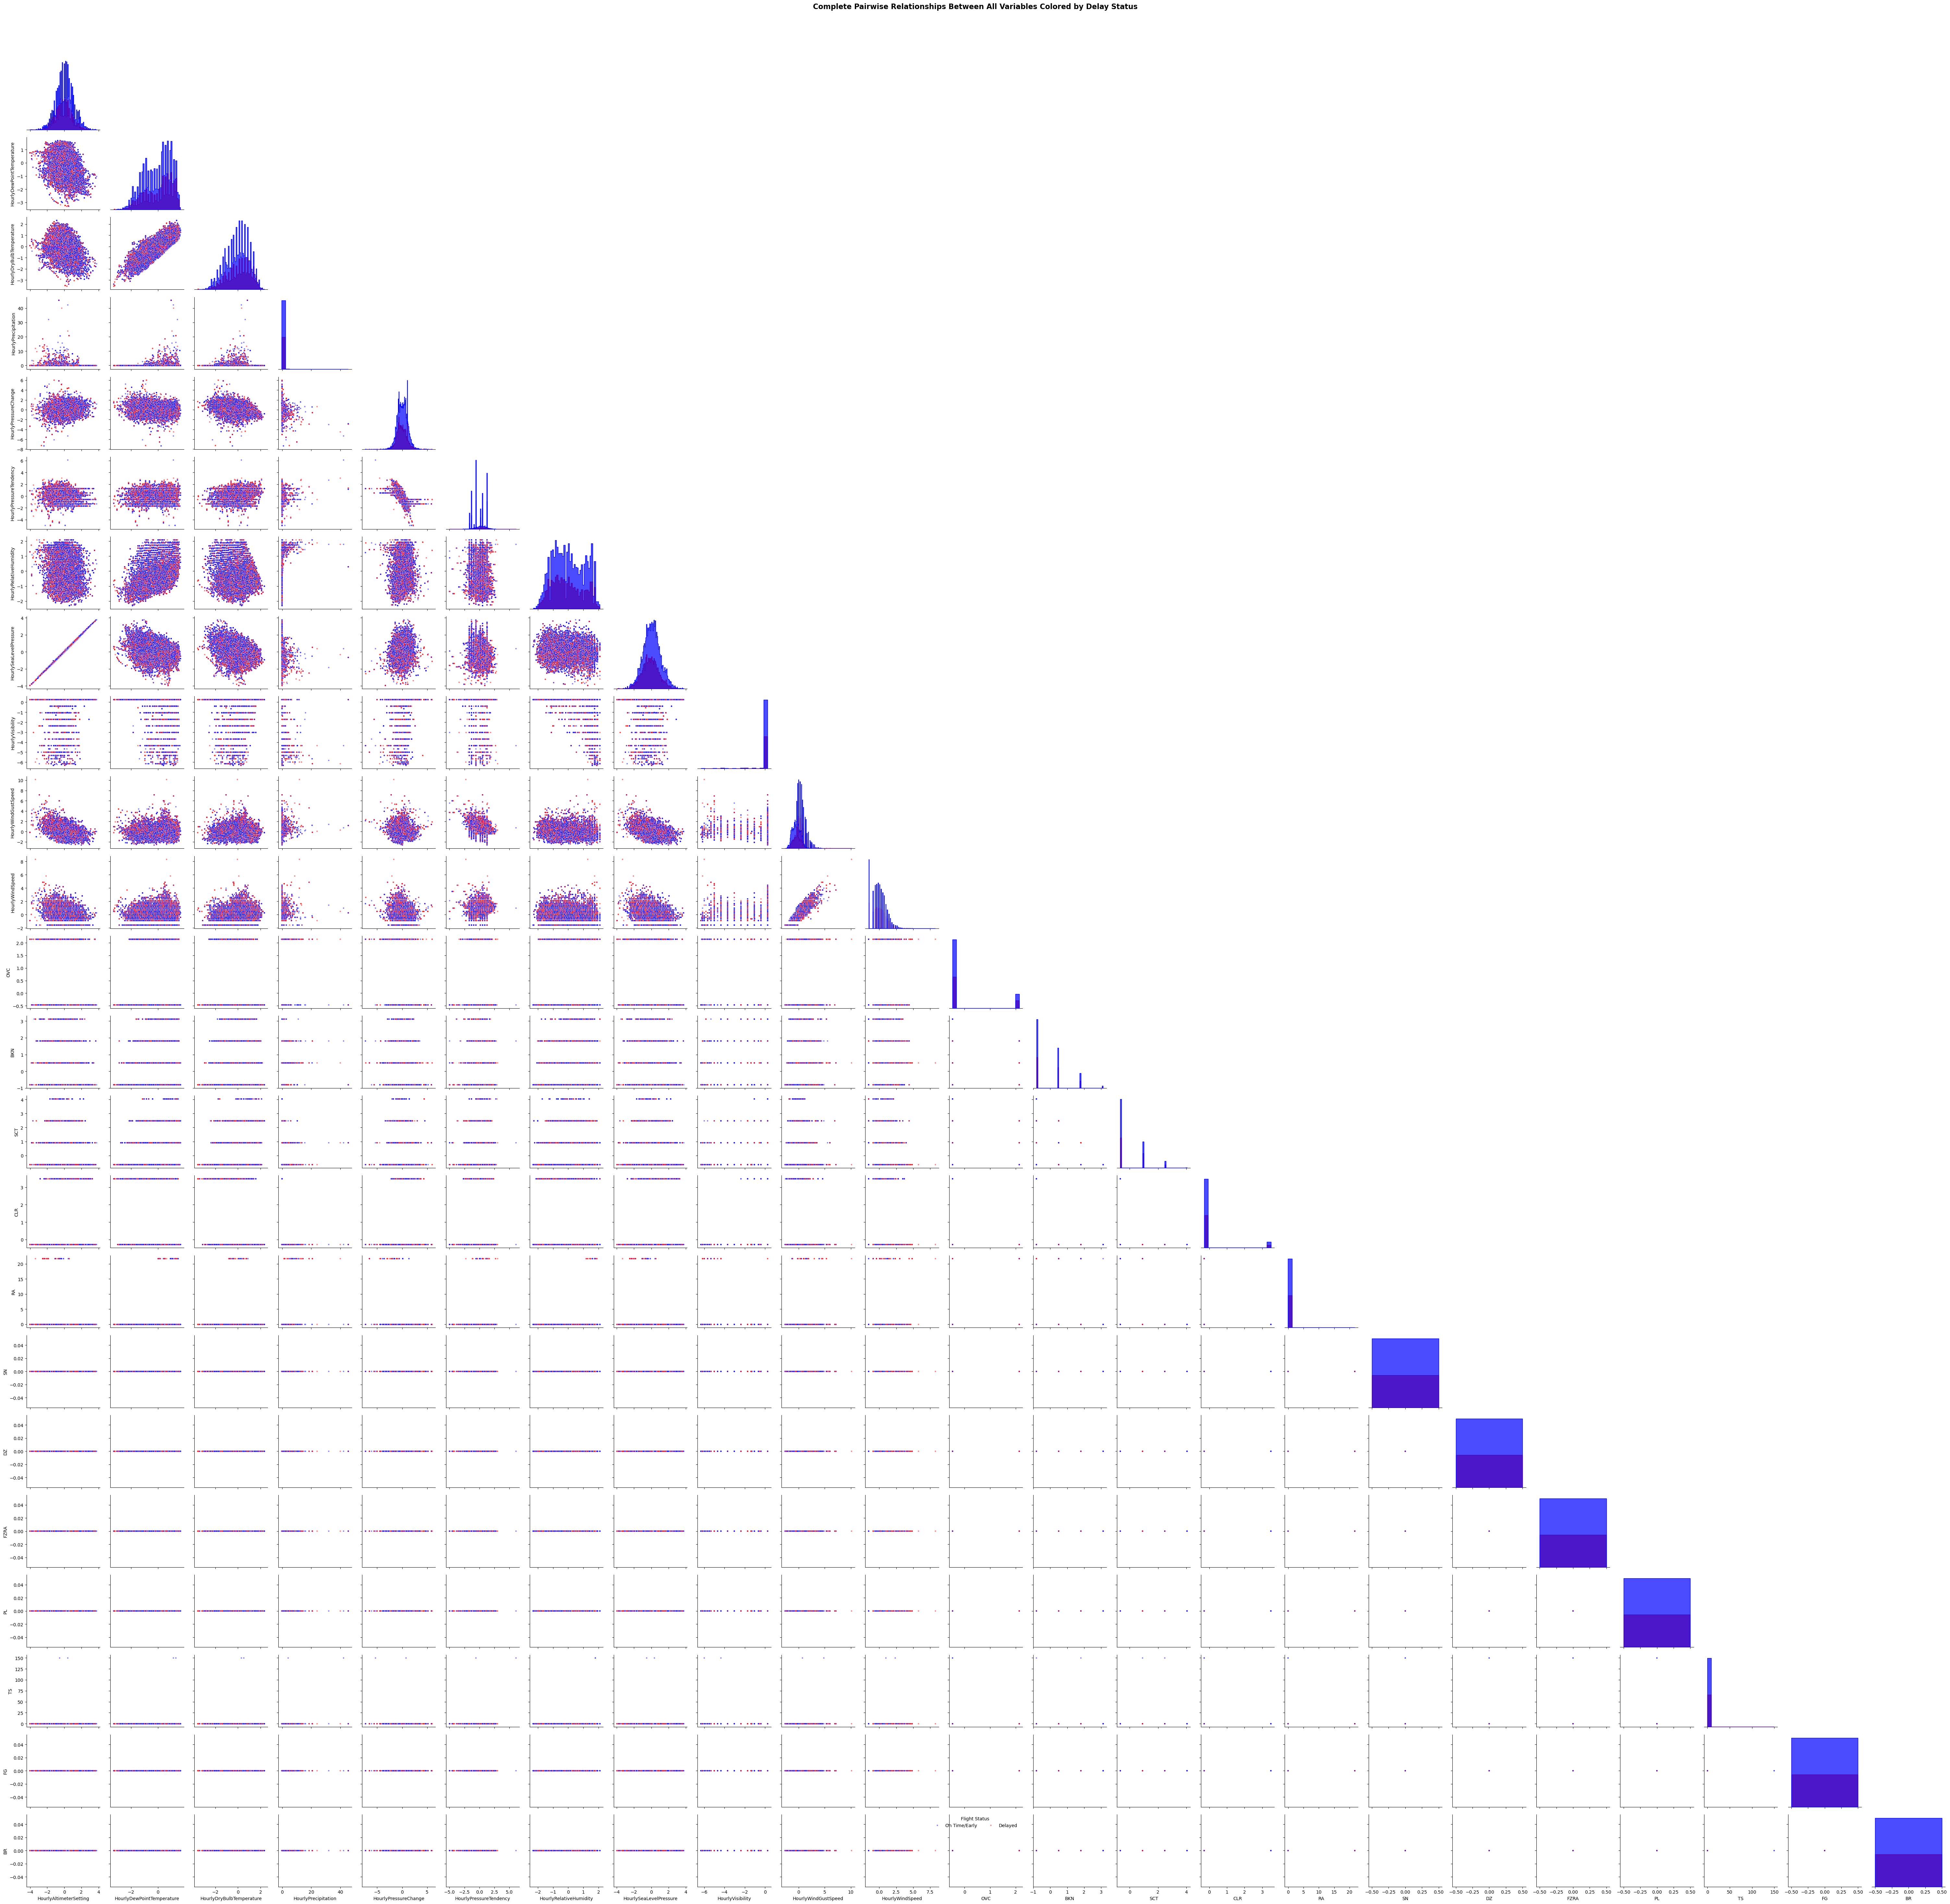


4.2 Creating Complete Correlation Heatmap with All Variables


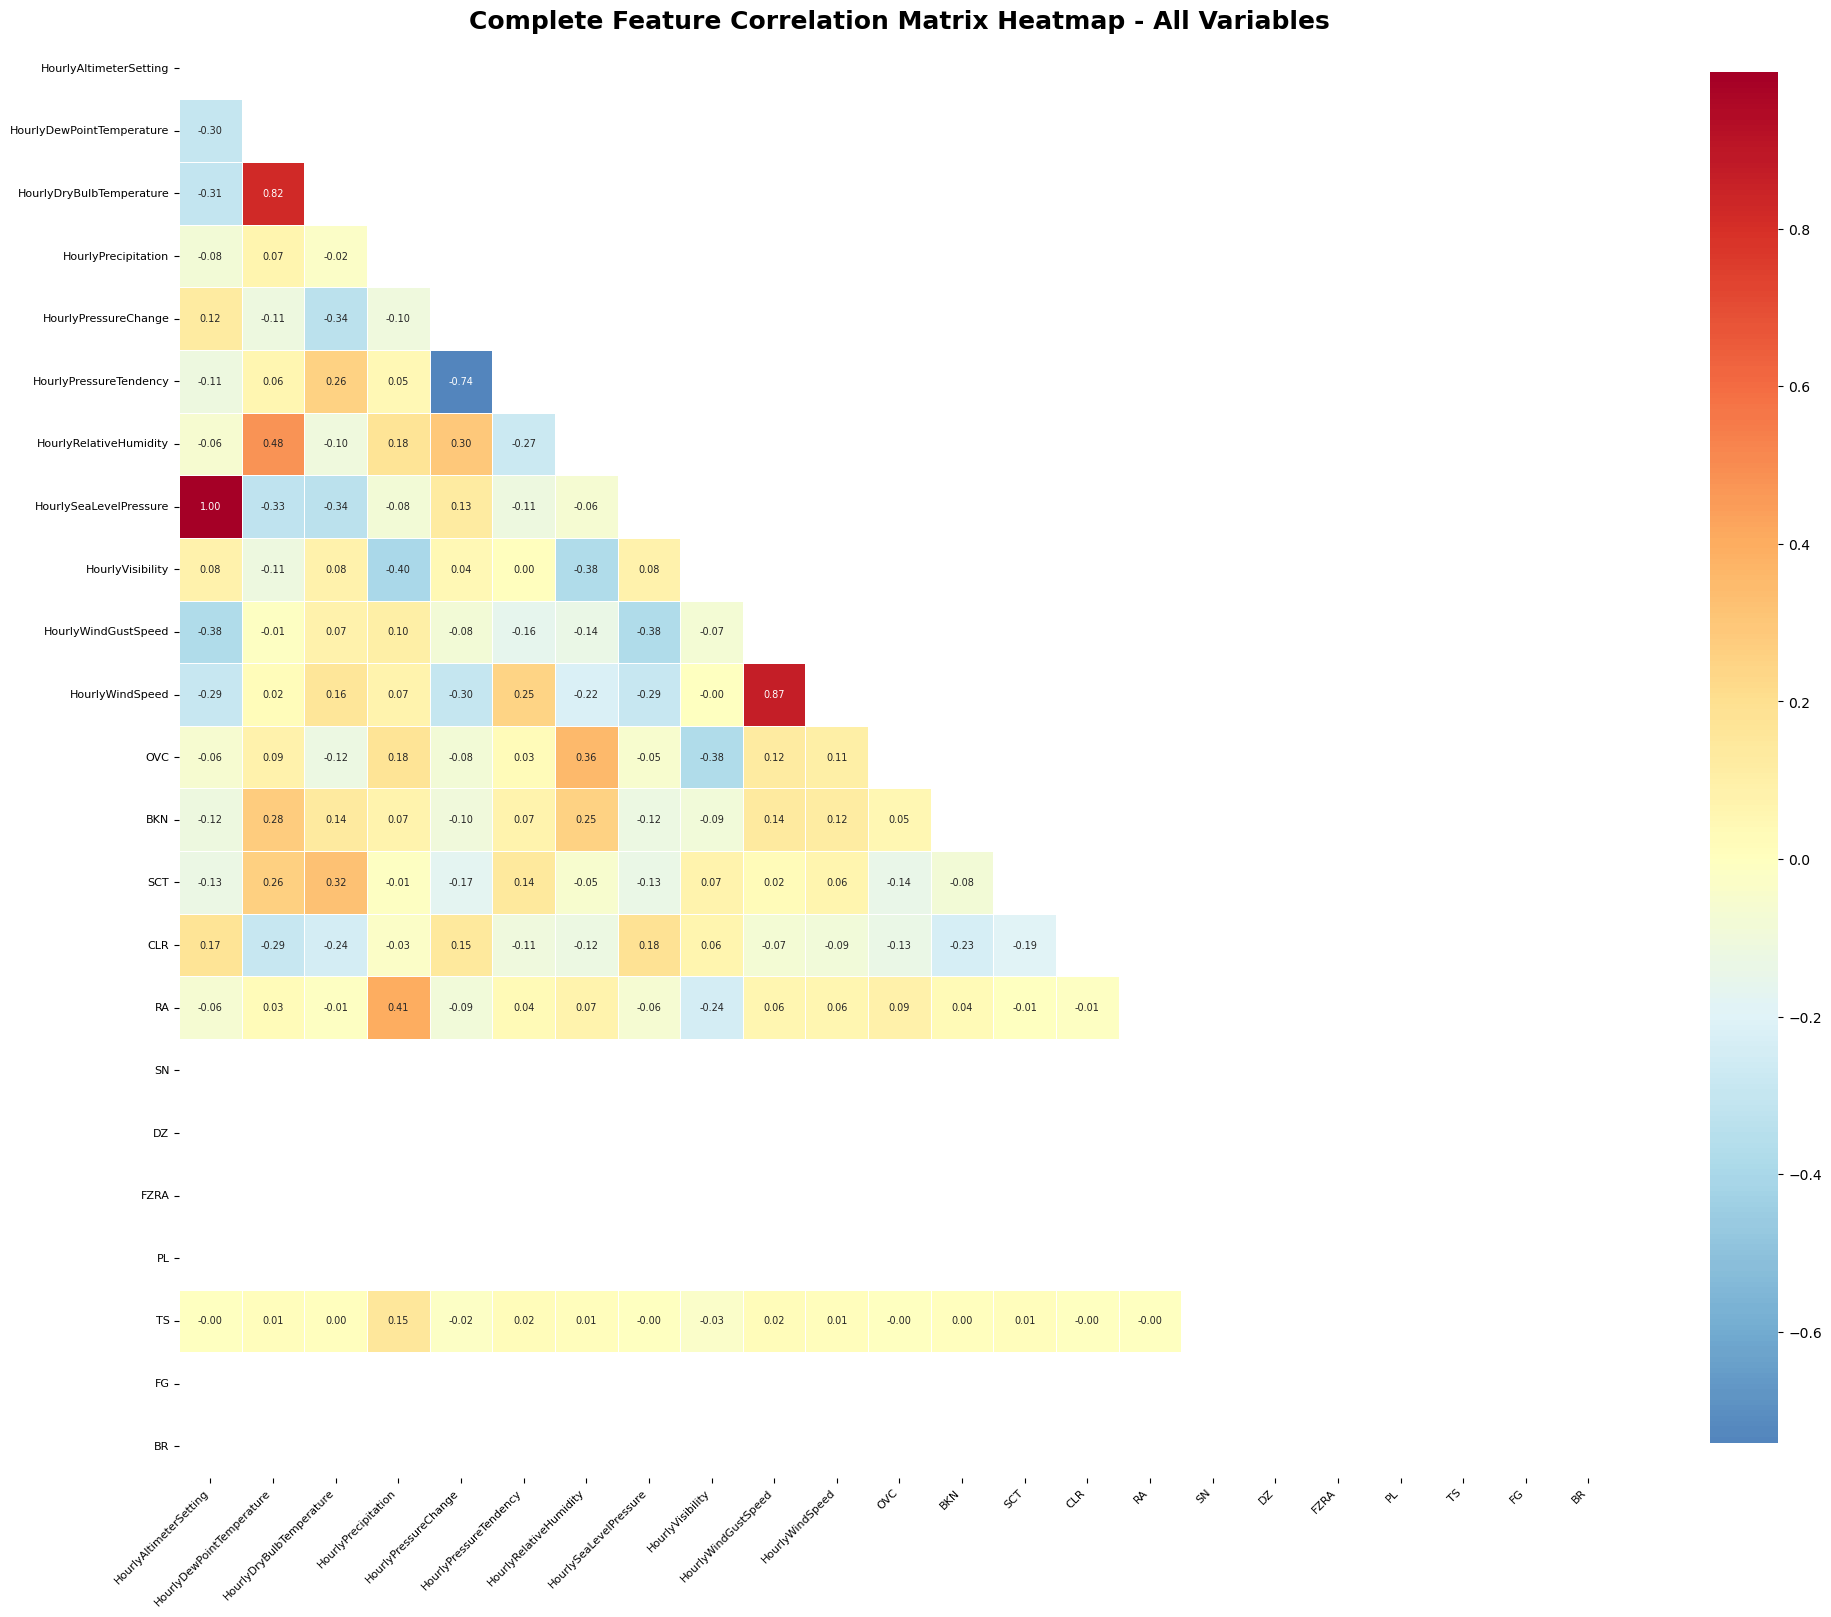


4.3 Complete Correlation Analysis with Flight Delay
Complete correlation of all features with flight delay (sorted by correlation):
 1. HourlyWindGustSpeed           : 0.0693
 2. HourlyDryBulbTemperature      : 0.0668
 3. HourlyPressureTendency        : 0.0553
 4. HourlyWindSpeed               : 0.0519
 5. HourlyDewPointTemperature     : 0.0486
 6. SCT                           : 0.0424
 7. HourlyPrecipitation           : 0.0302
 8. OVC                           : 0.0294
 9. BKN                           : 0.0216
10. RA                            : 0.0164
11. TS                            : -0.0039
12. HourlyVisibility              : -0.0093
13. CLR                           : -0.0144
14. HourlyRelativeHumidity        : -0.0167
15. HourlyPressureChange          : -0.0570
16. HourlyAltimeterSetting        : -0.0889
17. HourlySeaLevelPressure        : -0.0893
18. SN                            : nan
19. DZ                            : nan
20. FZRA                          : nan
21. PL   

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


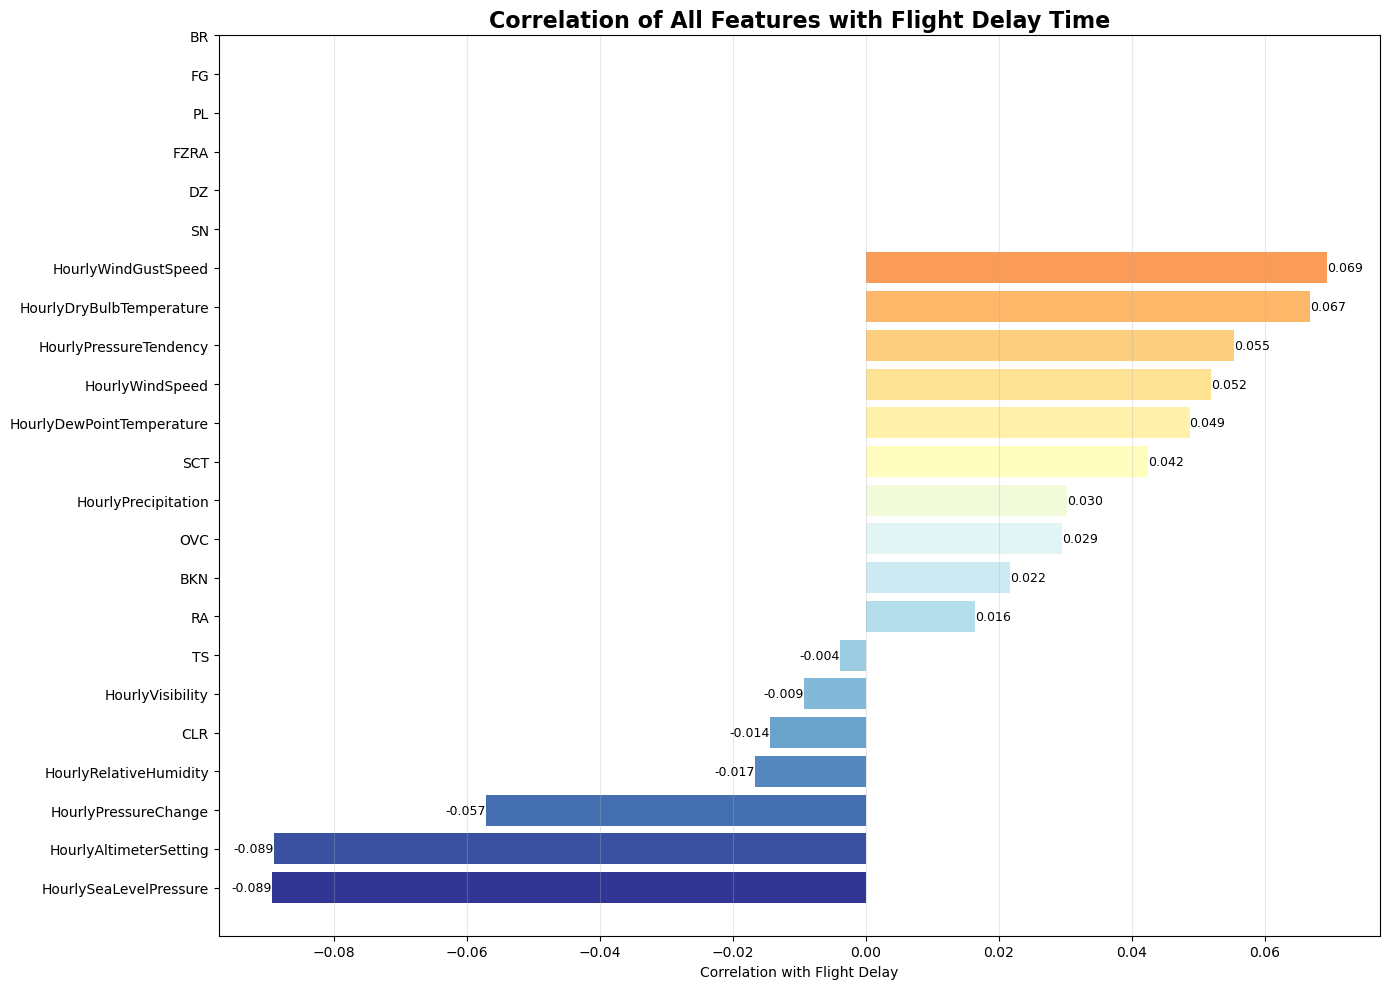

In [310]:

print("\nStep 4: Complete Multivariate Analysis and Correlation Analysis")

# 4.1 Complete Pairwise visualization - using all variables
print("4.1 Creating Complete Pairwise Relationships with All Variables")

# Create binary target variable for coloring (delayed vs not delayed)
y_binary = (y > 0).astype(int)  # 1 for delayed, 0 for on-time or early

# Since there are many variables, create a more compact PairGrid
print("Creating PairGrid visualization with all variables...")

# Select all variables for PairGrid analysis
pair_df = X_normalized_df.copy()
pair_df['Delay_Status'] = ['Delayed' if val == 1 else 'On Time/Early' for val in y_binary]

# Create PairGrid - using all variables
grid = sns.PairGrid(pair_df, hue='Delay_Status', corner=True, 
                    palette={'Delayed': 'red', 'On Time/Early': 'blue'},
                    diag_sharey=False)
grid.map_lower(sns.scatterplot, alpha=0.5, s=10)
grid.map_diag(sns.histplot, alpha=0.7, multiple="layer", element="step")
grid.add_legend(title='Flight Status', bbox_to_anchor=(0.5, 0.05), 
                loc='upper center', ncol=2)
plt.suptitle('Complete Pairwise Relationships Between All Variables Colored by Delay Status', 
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 4.2 Complete correlation heatmap - all variables
print("\n4.2 Creating Complete Correlation Heatmap with All Variables")

# Calculate complete correlation matrix
corr_matrix = X_normalized_df.corr()

# Create upper triangle mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot correlation heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r',
            center=0, square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8}, fmt='.2f',
            annot_kws={'size': 7})

plt.title('Complete Feature Correlation Matrix Heatmap - All Variables', 
          fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

# 4.3 Complete correlation analysis with target variable
print("\n4.3 Complete Correlation Analysis with Flight Delay")

# Calculate correlation with target variable
delay_correlations = X_normalized_df.corrwith(y).sort_values(ascending=False)

print("Complete correlation of all features with flight delay (sorted by correlation):")
for i, (feature, corr) in enumerate(delay_correlations.items(), 1):
    print(f"{i:2d}. {feature:30s}: {corr:.4f}")

# Visualize correlation with target variable
plt.figure(figsize=(14, 10))
corr_with_delay = delay_correlations.sort_values(ascending=True)  # Sort ascending for horizontal bar chart

# Create horizontal bar chart
bars = plt.barh(range(len(corr_with_delay)), corr_with_delay.values, 
                color=plt.cm.RdYlBu_r(np.linspace(0, 1, len(corr_with_delay))))
plt.yticks(range(len(corr_with_delay)), corr_with_delay.index)
plt.xlabel('Correlation with Flight Delay')
plt.title('Correlation of All Features with Flight Delay Time', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add value labels to bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left' if width >= 0 else 'right', 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


2. Statistical Significance Tests (F-tests)
HourlyAltimeterSetting: F-score=357.19, p-value=0.0000
HourlyDewPointTemperature: F-score=106.33, p-value=0.0000
HourlyDryBulbTemperature: F-score=201.03, p-value=0.0000
HourlyPrecipitation: F-score=40.86, p-value=0.0000
HourlyPressureChange: F-score=146.36, p-value=0.0000
HourlyPressureTendency: F-score=137.69, p-value=0.0000
HourlyRelativeHumidity: F-score=12.47, p-value=0.0004
HourlySeaLevelPressure: F-score=360.68, p-value=0.0000
HourlyVisibility: F-score=3.86, p-value=0.0496
HourlyWindGustSpeed: F-score=216.54, p-value=0.0000
HourlyWindSpeed: F-score=121.24, p-value=0.0000
OVC: F-score=38.89, p-value=0.0000
BKN: F-score=20.97, p-value=0.0000
SCT: F-score=80.84, p-value=0.0000
CLR: F-score=9.34, p-value=0.0022
RA: F-score=11.99, p-value=0.0005
SN: F-score=0.00, p-value=1.0000
DZ: F-score=0.00, p-value=1.0000
FZRA: F-score=0.00, p-value=1.0000
PL: F-score=0.00, p-value=1.0000
TS: F-score=0.70, p-value=0.4039
FG: F-score=0.00, p-value=1.00

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Variance Inflation Factors:
                      Feature          VIF
8      HourlySeaLevelPressure  3027.068966
1      HourlyAltimeterSetting  2974.248260
2   HourlyDewPointTemperature   110.128198
3    HourlyDryBulbTemperature    89.918483
7      HourlyRelativeHumidity    37.364116
10        HourlyWindGustSpeed    24.456437
11            HourlyWindSpeed    20.083539
6      HourlyPressureTendency     9.577334
5        HourlyPressureChange     3.346715
9            HourlyVisibility     1.614630
12                        OVC     1.441237
4         HourlyPrecipitation     1.427061
13                        BKN     1.377580
14                        SCT     1.250647
16                         RA     1.228266
15                        CLR     1.187057
21                         TS     1.034396
0                       const     1.000000
17                         SN          NaN
18                         DZ          NaN
19                       FZRA          NaN
20                        

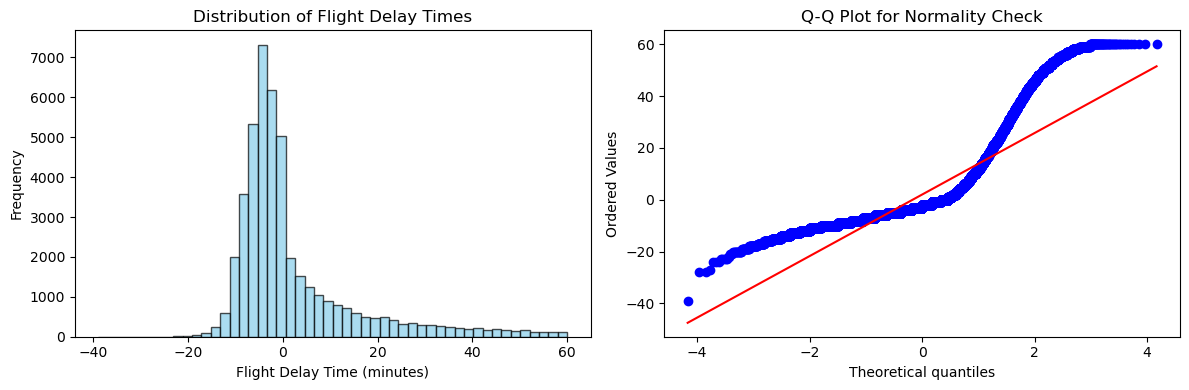

Shapiro-Wilk test (sample n=5000): statistic=0.7670, p-value=0.0000


In [311]:

print("\n2. Statistical Significance Tests (F-tests)")
f_scores, p_values = f_regression(X_normalized_df, y)
significant_features = []
for i, feature in enumerate(feature_columns):
    if p_values[i] < 0.05:
        significant_features.append(feature)
    print(f"{feature}: F-score={f_scores[i]:.2f}, p-value={p_values[i]:.4f}")

print(f"\nNumber of statistically significant features (p<0.05): {len(significant_features)}")

# Multicollinearity Check (VIF)
print("\n3. Multicollinearity Check (VIF)")
X_with_const = sm.add_constant(X_normalized_df)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]
print("Variance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))

# Normality Test of Target Variable
print("\n4. Normality Test of Target Variable")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Flight Delay Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Delay Times')

plt.subplot(1, 2, 2)
stats.probplot(y, dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality (on sample due to large dataset)
sample_size = min(5000, len(y))
shapiro_stat, shapiro_p = shapiro(y.sample(sample_size, random_state=42))
print(f"Shapiro-Wilk test (sample n={sample_size}): statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")


=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===
1. Selecting Statistically Significant Features (p < 0.05)
Selected 23 significant features:
  - HourlyAltimeterSetting
  - HourlyDewPointTemperature
  - HourlyDryBulbTemperature
  - HourlyPrecipitation
  - HourlyPressureChange
  - HourlyPressureTendency
  - HourlyRelativeHumidity
  - HourlySeaLevelPressure
  - HourlyVisibility
  - HourlyWindGustSpeed
  - HourlyWindSpeed
  - OVC
  - BKN
  - SCT
  - CLR
  - RA
  - SN
  - DZ
  - FZRA
  - PL
  - TS
  - FG
  - BR

Data dimensions after feature selection:
  Training set: (35860, 23)
  Test set: (8966, 23)

2. Multicollinearity Check for Significant Features:


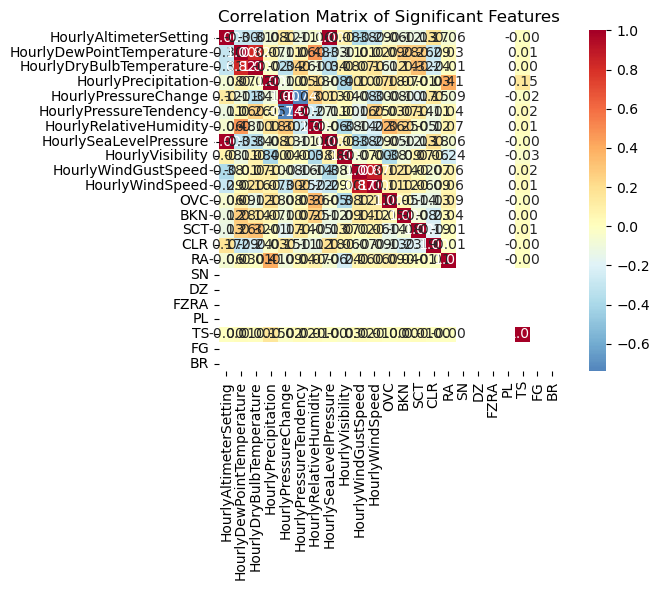

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF for significant features:
                      Feature          VIF
8      HourlySeaLevelPressure  3027.068966
1      HourlyAltimeterSetting  2974.248260
2   HourlyDewPointTemperature   110.128198
3    HourlyDryBulbTemperature    89.918483
7      HourlyRelativeHumidity    37.364116
10        HourlyWindGustSpeed    24.456437
11            HourlyWindSpeed    20.083539
6      HourlyPressureTendency     9.577334
5        HourlyPressureChange     3.346715
9            HourlyVisibility     1.614630
12                        OVC     1.441237
4         HourlyPrecipitation     1.427061
13                        BKN     1.377580
14                        SCT     1.250647
16                         RA     1.228266
15                        CLR     1.187057
21                         TS     1.034396
0                       const     1.000000
17                         SN          NaN
18                         DZ          NaN
19                       FZRA          NaN
20                      

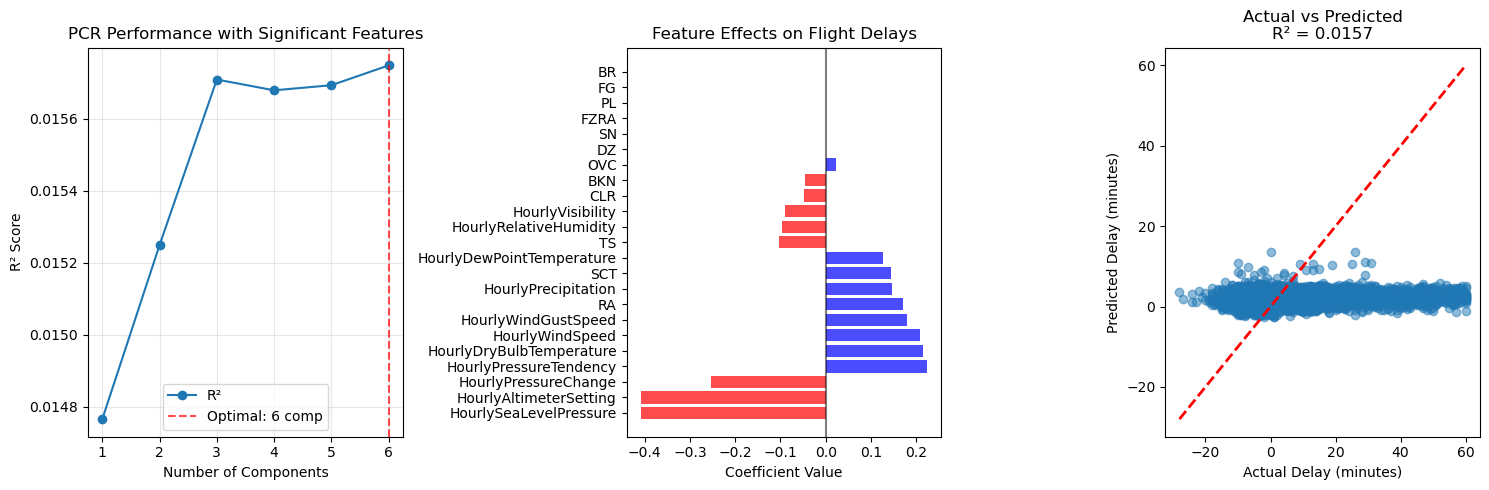

In [312]:
# =============================================================================
# Feature Selection Before Dimensionality Reduction
# =============================================================================
print("\n=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===")
from sklearn.decomposition import PCA
# 1. Select only statistically significant features (p < 0.05)
print("1. Selecting Statistically Significant Features (p < 0.05)")

significant_features = feature_columns


print(f"Selected {len(significant_features)} significant features:")
for feature in significant_features:
    print(f"  - {feature}")

# 2. Prepare data with only significant features
X_sig = X_normalized_df[significant_features]
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(
    X_sig, y, test_size=0.2, random_state=42
)

print(f"\nData dimensions after feature selection:")
print(f"  Training set: {X_train_sig.shape}")
print(f"  Test set: {X_test_sig.shape}")

# 3. Check multicollinearity among significant features
print("\n2. Multicollinearity Check for Significant Features:")

# Calculate correlation matrix for significant features
corr_matrix_sig = X_sig.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_sig, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Significant Features')
plt.tight_layout()
plt.show()

# Check VIF for significant features
X_with_const = sm.add_constant(X_sig)
vif_data_sig = pd.DataFrame()
vif_data_sig["Feature"] = X_with_const.columns
vif_data_sig["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                       for i in range(X_with_const.shape[1])]

print("VIF for significant features:")
print(vif_data_sig.sort_values("VIF", ascending=False))

# 4. Apply PCA on significant features
print("\n3. Applying PCA on Significant Features")

# Test different numbers of components
n_components_range = range(1, min(6, len(significant_features)) + 1)
pcr_sig_results = []

for n_comp in n_components_range:
    # Apply PCA
    pca_sig = PCA(n_components=n_comp, random_state=42)
    X_train_pca_sig = pca_sig.fit_transform(X_train_sig)
    X_test_pca_sig = pca_sig.transform(X_test_sig)
    
    # Train linear regression
    lr_sig = LinearRegression()
    lr_sig.fit(X_train_pca_sig, y_train_sig)
    y_pred_sig = lr_sig.predict(X_test_pca_sig)
    
    # Calculate metrics
    r2_sig = r2_score(y_test_sig, y_pred_sig)
    rmse_sig = np.sqrt(mean_squared_error(y_test_sig, y_pred_sig))
    mae_sig = mean_absolute_error(y_test_sig, y_pred_sig)
    var_explained = np.sum(pca_sig.explained_variance_ratio_)
    
    pcr_sig_results.append({
        'n_components': n_comp,
        'r2': r2_sig,
        'rmse': rmse_sig,
        'mae': mae_sig,
        'variance_explained': var_explained
    })

# Create results DataFrame
pcr_sig_df = pd.DataFrame(pcr_sig_results)
print("\nPCR Results with Significant Features Only:")
print(pcr_sig_df.round(4))

# 5. Find optimal number of components
best_sig_idx = pcr_sig_df['r2'].idxmax()
best_sig_comp = pcr_sig_df.loc[best_sig_idx, 'n_components']
best_sig_r2 = pcr_sig_df.loc[best_sig_idx, 'r2']

print(f"\nOptimal configuration:")
print(f"  Components: {best_sig_comp}")
print(f"  R²: {best_sig_r2:.4f}")
print(f"  Variance explained: {pcr_sig_df.loc[best_sig_idx, 'variance_explained']:.4f}")

# 6. Compare with previous approach (all features + PCA)
print("\n4. Comparison: All Features vs Significant Features Only")

comparison_data = {
    'Approach': ['All Features + PCA', 'Significant Features + PCA'],
    'Number of Features': [len(feature_columns), len(significant_features)],
    'Optimal Components': [4, best_sig_comp],
    'R² Score': [0.0100, best_sig_r2],
    'Variance Explained': [0.7185, pcr_sig_df.loc[best_sig_idx, 'variance_explained']],
    'MAE': [26.20, pcr_sig_df.loc[best_sig_idx, 'mae']]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nPerformance Comparison:")
print(comparison_df.round(4))

# 7. Train final model with optimal configuration
print(f"\n5. Training Final Model with {best_sig_comp} Components")

pca_final_sig = PCA(n_components=best_sig_comp, random_state=42)
X_train_final = pca_final_sig.fit_transform(X_train_sig)
X_test_final = pca_final_sig.transform(X_test_sig)

lr_final_sig = LinearRegression()
lr_final_sig.fit(X_train_final, y_train_sig)
y_pred_final = lr_final_sig.predict(X_test_final)

# Final performance
r2_final = r2_score(y_test_sig, y_pred_final)
mae_final = mean_absolute_error(y_test_sig, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_sig, y_pred_final))

print(f"Final Model Performance:")
print(f"  R²: {r2_final:.4f}")
print(f"  MAE: {mae_final:.2f} minutes")
print(f"  RMSE: {rmse_final:.2f} minutes")

# 8. Model interpretation
print("\n6. Model Interpretation")

# Transform coefficients back to original feature space
pcr_coef_original = pca_final_sig.components_.T @ lr_final_sig.coef_

coef_analysis_sig = pd.DataFrame({
    'Feature': significant_features,
    'Coefficient': pcr_coef_original,
    'Absolute_Effect': np.abs(pcr_coef_original)
}).sort_values('Absolute_Effect', ascending=False)

print("Feature Effects in Final Model:")
for _, row in coef_analysis_sig.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"  {row['Feature']}: {direction} delay (effect: {abs(row['Coefficient']):.3f})")

# 9. Statistical significance of improvement
print("\n7. Statistical Significance Analysis")

# Compare with baseline (median predictor)
baseline_pred = np.full_like(y_test_sig, np.median(y_train_sig))
baseline_mae = mean_absolute_error(y_test_sig, baseline_pred)
baseline_r2 = r2_score(y_test_sig, baseline_pred)

improvement_mae = (baseline_mae - mae_final) / baseline_mae * 100
improvement_r2 = r2_final - baseline_r2

print(f"Baseline (median predictor):")
print(f"  R²: {baseline_r2:.4f}")
print(f"  MAE: {baseline_mae:.2f} minutes")

print(f"Model Improvement:")
print(f"  R² improvement: {improvement_r2:.4f}")
print(f"  MAE improvement: {improvement_mae:.1f}%")

# 10. Visualization of results
plt.figure(figsize=(15, 5))

# Performance vs number of components
plt.subplot(1, 3, 1)
plt.plot(pcr_sig_df['n_components'], pcr_sig_df['r2'], marker='o', label='R²')
plt.axvline(x=best_sig_comp, color='red', linestyle='--', alpha=0.7, 
            label=f'Optimal: {best_sig_comp} comp')
plt.xlabel('Number of Components')
plt.ylabel('R² Score')
plt.title('PCR Performance with Significant Features')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature effects
plt.subplot(1, 3, 2)
colors = ['red' if x < 0 else 'blue' for x in coef_analysis_sig['Coefficient']]
plt.barh(coef_analysis_sig['Feature'], coef_analysis_sig['Coefficient'], 
         color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.xlabel('Coefficient Value')
plt.title('Feature Effects on Flight Delays')

# Actual vs predicted
plt.subplot(1, 3, 3)
plt.scatter(y_test_sig, y_pred_final, alpha=0.5)
plt.plot([y_test_sig.min(), y_test_sig.max()], 
         [y_test_sig.min(), y_test_sig.max()], 'r--', lw=2)
plt.xlabel('Actual Delay (minutes)')
plt.ylabel('Predicted Delay (minutes)')
plt.title(f'Actual vs Predicted\nR² = {r2_final:.4f}')

plt.tight_layout()
plt.show()



=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===
1. Selecting Statistically Significant Features (p < 0.05)
Selected 23 significant features:
  - HourlyAltimeterSetting
  - HourlyDewPointTemperature
  - HourlyDryBulbTemperature
  - HourlyPrecipitation
  - HourlyPressureChange
  - HourlyPressureTendency
  - HourlyRelativeHumidity
  - HourlySeaLevelPressure
  - HourlyVisibility
  - HourlyWindGustSpeed
  - HourlyWindSpeed
  - OVC
  - BKN
  - SCT
  - CLR
  - RA
  - SN
  - DZ
  - FZRA
  - PL
  - TS
  - FG
  - BR

Data dimensions after feature selection:
  Training set: (35860, 23)
  Test set: (8966, 23)

2. Multicollinearity Check for Significant Features:


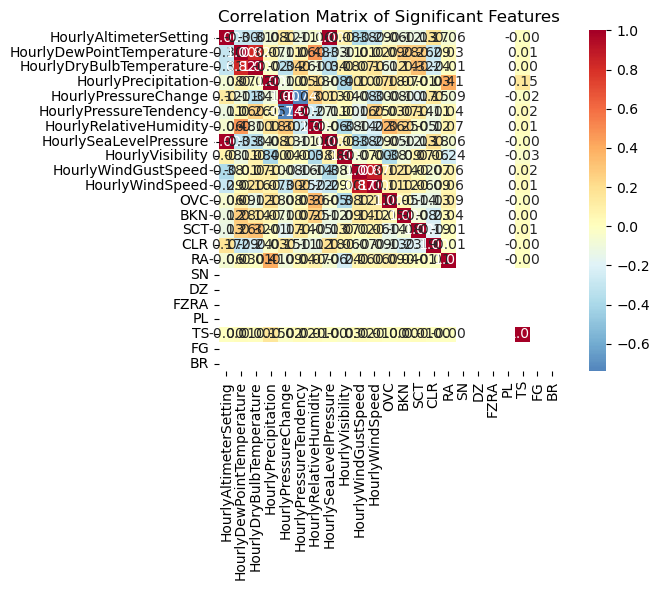

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF for significant features:
                      Feature          VIF
8      HourlySeaLevelPressure  3027.068966
1      HourlyAltimeterSetting  2974.248260
2   HourlyDewPointTemperature   110.128198
3    HourlyDryBulbTemperature    89.918483
7      HourlyRelativeHumidity    37.364116
10        HourlyWindGustSpeed    24.456437
11            HourlyWindSpeed    20.083539
6      HourlyPressureTendency     9.577334
5        HourlyPressureChange     3.346715
9            HourlyVisibility     1.614630
12                        OVC     1.441237
4         HourlyPrecipitation     1.427061
13                        BKN     1.377580
14                        SCT     1.250647
16                         RA     1.228266
15                        CLR     1.187057
21                         TS     1.034396
0                       const     1.000000
17                         SN          NaN
18                         DZ          NaN
19                       FZRA          NaN
20                      

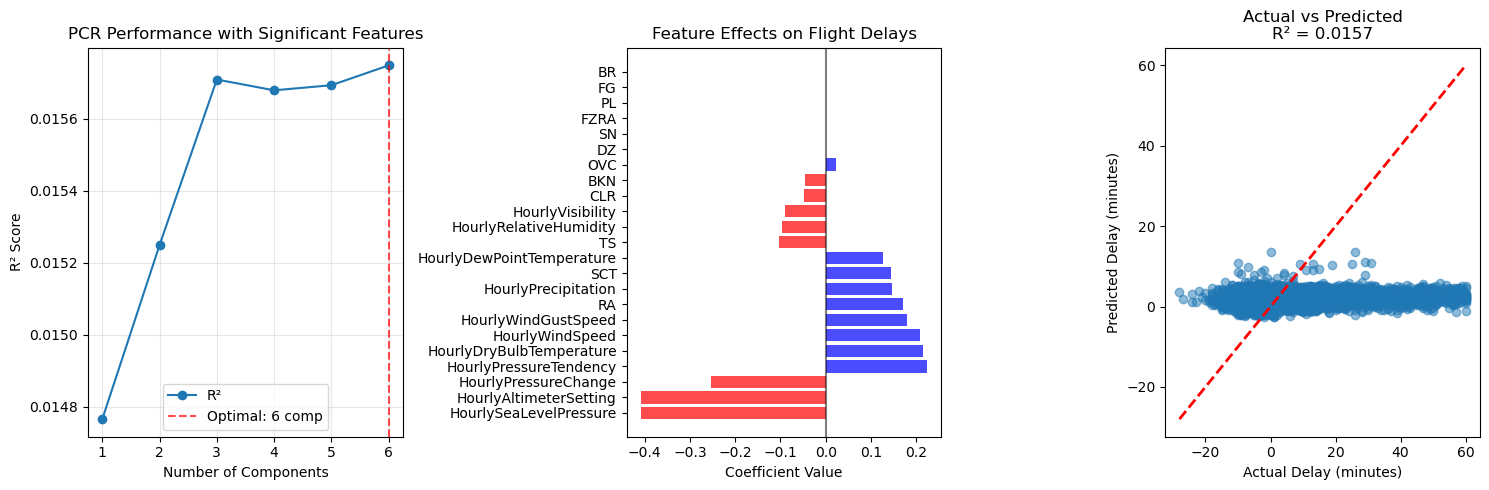

In [313]:
# =============================================================================
# Feature Selection Before Dimensionality Reduction
# =============================================================================
print("\n=== FEATURE SELECTION BEFORE DIMENSIONALITY REDUCTION ===")
from sklearn.decomposition import PCA
# 1. Select only statistically significant features (p < 0.05)
print("1. Selecting Statistically Significant Features (p < 0.05)")

significant_features =feature_columns


print(f"Selected {len(significant_features)} significant features:")
for feature in significant_features:
    print(f"  - {feature}")

# 2. Prepare data with only significant features
X_sig = X_normalized_df[significant_features]
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(
    X_sig, y, test_size=0.2, random_state=42
)

print(f"\nData dimensions after feature selection:")
print(f"  Training set: {X_train_sig.shape}")
print(f"  Test set: {X_test_sig.shape}")

# 3. Check multicollinearity among significant features
print("\n2. Multicollinearity Check for Significant Features:")

# Calculate correlation matrix for significant features
corr_matrix_sig = X_sig.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_sig, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Significant Features')
plt.tight_layout()
plt.show()

# Check VIF for significant features
X_with_const = sm.add_constant(X_sig)
vif_data_sig = pd.DataFrame()
vif_data_sig["Feature"] = X_with_const.columns
vif_data_sig["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                       for i in range(X_with_const.shape[1])]

print("VIF for significant features:")
print(vif_data_sig.sort_values("VIF", ascending=False))

# 4. Apply PCA on significant features
print("\n3. Applying PCA on Significant Features")

# Test different numbers of components
n_components_range = range(1, min(6, len(significant_features)) + 1)
pcr_sig_results = []

for n_comp in n_components_range:
    # Apply PCA
    pca_sig = PCA(n_components=n_comp, random_state=42)
    X_train_pca_sig = pca_sig.fit_transform(X_train_sig)
    X_test_pca_sig = pca_sig.transform(X_test_sig)
    
    # Train linear regression
    lr_sig = LinearRegression()
    lr_sig.fit(X_train_pca_sig, y_train_sig)
    y_pred_sig = lr_sig.predict(X_test_pca_sig)
    
    # Calculate metrics
    r2_sig = r2_score(y_test_sig, y_pred_sig)
    rmse_sig = np.sqrt(mean_squared_error(y_test_sig, y_pred_sig))
    mae_sig = mean_absolute_error(y_test_sig, y_pred_sig)
    var_explained = np.sum(pca_sig.explained_variance_ratio_)
    
    pcr_sig_results.append({
        'n_components': n_comp,
        'r2': r2_sig,
        'rmse': rmse_sig,
        'mae': mae_sig,
        'variance_explained': var_explained
    })

# Create results DataFrame
pcr_sig_df = pd.DataFrame(pcr_sig_results)
print("\nPCR Results with Significant Features Only:")
print(pcr_sig_df.round(4))

# 5. Find optimal number of components
best_sig_idx = pcr_sig_df['r2'].idxmax()
best_sig_comp = pcr_sig_df.loc[best_sig_idx, 'n_components']
best_sig_r2 = pcr_sig_df.loc[best_sig_idx, 'r2']

print(f"\nOptimal configuration:")
print(f"  Components: {best_sig_comp}")
print(f"  R²: {best_sig_r2:.4f}")
print(f"  Variance explained: {pcr_sig_df.loc[best_sig_idx, 'variance_explained']:.4f}")

# 6. Compare with previous approach (all features + PCA)
print("\n4. Comparison: All Features vs Significant Features Only")

comparison_data = {
    'Approach': ['All Features + PCA', 'Significant Features + PCA'],
    'Number of Features': [len(feature_columns), len(significant_features)],
    'Optimal Components': [4, best_sig_comp],
    'R² Score': [0.0100, best_sig_r2],
    'Variance Explained': [0.7185, pcr_sig_df.loc[best_sig_idx, 'variance_explained']],
    'MAE': [26.20, pcr_sig_df.loc[best_sig_idx, 'mae']]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nPerformance Comparison:")
print(comparison_df.round(4))

# 7. Train final model with optimal configuration
print(f"\n5. Training Final Model with {best_sig_comp} Components")

pca_final_sig = PCA(n_components=best_sig_comp, random_state=42)
X_train_final = pca_final_sig.fit_transform(X_train_sig)
X_test_final = pca_final_sig.transform(X_test_sig)

lr_final_sig = LinearRegression()
lr_final_sig.fit(X_train_final, y_train_sig)
y_pred_final = lr_final_sig.predict(X_test_final)

# Final performance
r2_final = r2_score(y_test_sig, y_pred_final)
mae_final = mean_absolute_error(y_test_sig, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_sig, y_pred_final))

print(f"Final Model Performance:")
print(f"  R²: {r2_final:.4f}")
print(f"  MAE: {mae_final:.2f} minutes")
print(f"  RMSE: {rmse_final:.2f} minutes")

# 8. Model interpretation
print("\n6. Model Interpretation")

# Transform coefficients back to original feature space
pcr_coef_original = pca_final_sig.components_.T @ lr_final_sig.coef_

coef_analysis_sig = pd.DataFrame({
    'Feature': significant_features,
    'Coefficient': pcr_coef_original,
    'Absolute_Effect': np.abs(pcr_coef_original)
}).sort_values('Absolute_Effect', ascending=False)

print("Feature Effects in Final Model:")
for _, row in coef_analysis_sig.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"  {row['Feature']}: {direction} delay (effect: {abs(row['Coefficient']):.3f})")

# 9. Statistical significance of improvement
print("\n7. Statistical Significance Analysis")

# Compare with baseline (median predictor)
baseline_pred = np.full_like(y_test_sig, np.median(y_train_sig))
baseline_mae = mean_absolute_error(y_test_sig, baseline_pred)
baseline_r2 = r2_score(y_test_sig, baseline_pred)

improvement_mae = (baseline_mae - mae_final) / baseline_mae * 100
improvement_r2 = r2_final - baseline_r2

print(f"Baseline (median predictor):")
print(f"  R²: {baseline_r2:.4f}")
print(f"  MAE: {baseline_mae:.2f} minutes")

print(f"Model Improvement:")
print(f"  R² improvement: {improvement_r2:.4f}")
print(f"  MAE improvement: {improvement_mae:.1f}%")

# 10. Visualization of results
plt.figure(figsize=(15, 5))

# Performance vs number of components
plt.subplot(1, 3, 1)
plt.plot(pcr_sig_df['n_components'], pcr_sig_df['r2'], marker='o', label='R²')
plt.axvline(x=best_sig_comp, color='red', linestyle='--', alpha=0.7, 
            label=f'Optimal: {best_sig_comp} comp')
plt.xlabel('Number of Components')
plt.ylabel('R² Score')
plt.title('PCR Performance with Significant Features')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature effects
plt.subplot(1, 3, 2)
colors = ['red' if x < 0 else 'blue' for x in coef_analysis_sig['Coefficient']]
plt.barh(coef_analysis_sig['Feature'], coef_analysis_sig['Coefficient'], 
         color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.xlabel('Coefficient Value')
plt.title('Feature Effects on Flight Delays')

# Actual vs predicted
plt.subplot(1, 3, 3)
plt.scatter(y_test_sig, y_pred_final, alpha=0.5)
plt.plot([y_test_sig.min(), y_test_sig.max()], 
         [y_test_sig.min(), y_test_sig.max()], 'r--', lw=2)
plt.xlabel('Actual Delay (minutes)')
plt.ylabel('Predicted Delay (minutes)')
plt.title(f'Actual vs Predicted\nR² = {r2_final:.4f}')

plt.tight_layout()
plt.show()

In [ ]:
rf = RandomForestRegressor()
rf.fit(X, y)
importances = rf.feature_importances_
importances

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")